## **Estimation of the depths of magmatic objects using potential fields and machine learning methods**

The code is designed to predict the depths of magmatic objects (reservoir intrusions, dikes), based on the analysis of gravitational, magnetic anomalies and GIS data. Potential field processing methods and ensemble machine learning algorithms are used.

I would be glad to hear your comment on the code or upvote, thank you)))

---

### Methodology
### Source data
- **Site No. 1**: 20 magmatic objects (dolerites, granophyres), cross-validation data.
- **Site No. 2**: 43 objects (Triassic dikes, dunites), forecast area.

### Algorithms
1. **Linear models**:
- ElasticNet regression
2. **Ensemble methods**:
- XGBoost, CatBoost, LGBM, HGBM with feature importance assessment
- Stacking ensemble (StackingRegressor) for combining predictions (separately for logging models and potential fields)

### Key parameters
- The Magnetic field
- The gravity field
- Low-frequency components of potential fields
- Local components of potential fields
- Tilt transformations of potential fields
- Low-frequency Tilt transformations
- The effect of the foundation on potential fields
- Vertical and horizontal derivatives of potential fields
- Analytical signal of potential fields
- Relief of the Earth's surface
- Depth to the border of the Moho
- Logging data ('PZ', 'PS', 'NGK', 'GZ3', 'GK', 'DS')
- Depth map of anomaly-forming objects based on modeling results (Target)

---

## Results
### Quality metrics
Type of model| Model | RMSE (m) | MAE (m) |
|---------|---------------------|----------|---------|
Linear           | Ridge               | Not Applied    | Not Applied   |
Linear           | Lasso               | Not Applied    | Not Applied   |
Linear           | ElasticNet          | 833            | 624           |
Decision trees   | RandomForest        | Not Applied    | Not Applied   |
Gradient Boosting| XGBoost             | 136            | 60            |
Gradient Boosting| LGBM                | 141            | 65            |
Gradient Boosting| CatBoost            | 149            | 77            |
Gradient Boosting| HGBM                | 147            | 72            |
Gradient Boosting| GBM                 | Not Applied    | Not Applied   |
Merged           | StackingRegressor   | 417            | 317           |
Участок сравнения| XGBoost             | 173            | 81            |

---

## Verification
- Comparison with drilling data showed:
- Borehole data
- Seismic data

---

## Conclusion
1. The effectiveness of machine learning models
The best model: XGBoostRegressor demonstrated the highest accuracy in section No. 1 with metrics RMSE = 136 m and MAE = 60 m.
Boosting models (XGBoost, LGBM, CatBoost) showed significantly better results than linear models (ElasticNet) and Stacking.
Linear methods (RMSE > 800 m) proved unsuitable for complex nonlinear data dependencies.
The stacking model worsened the forecast due to a suboptimal combination of basic algorithms.
2. Forecast results for site No. 2
The XGBoost model retained high predictive power with RMSE = 173 m and MAE = 81 m, which is close to the results in site No. 1.
3. Practical significance and recommendations
For geological exploration: The model reduces drilling risks by predicting the depths of the foundation and identifying promising areas.
For research purposes:
Include high-resolution gravimetric and magnetic data instead of retrospective data.
Experiment with ensemble methods that take into account the specifics of magmatic bodies.

---

## Literature
1. Akiba, T., et al. (2019). Optuna: A Next-generation Hyperparameter Optimization Framework. KDD.
2. Bergstra, J., & Bengio, Y. (2012). Random Search for Hyper-Parameter Optimization. JMLR.
3. Chen, T., Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. arXiv:1603.02754.
4. Hastie T., Tibshirani R., Friedman J. The Elements of Statistical Learning: Data Mining, Inference, and Prediction. — 2nd ed. — Springer, 2009. — 746 p.
5. Ke, G., et al. (2017). LightGBM: A Highly Efficient Gradient Boosting Decision Tree. NeurIPS.
6. Menke W. Geophysical Data Analysis: Understanding Inverse Problem Theory and Practice. — Academic Press, 2018. — 303 p.
7. Prokhorenkova, L., et al. (2018). CatBoost: Unbiased Boosting with Categorical Features. NeurIPS.

---
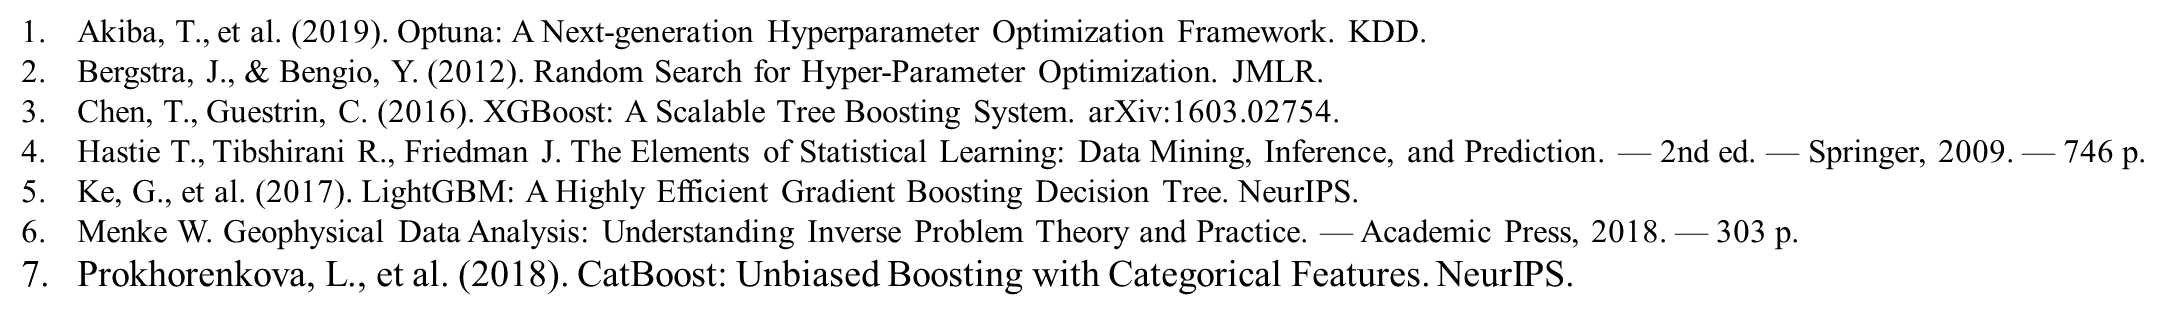
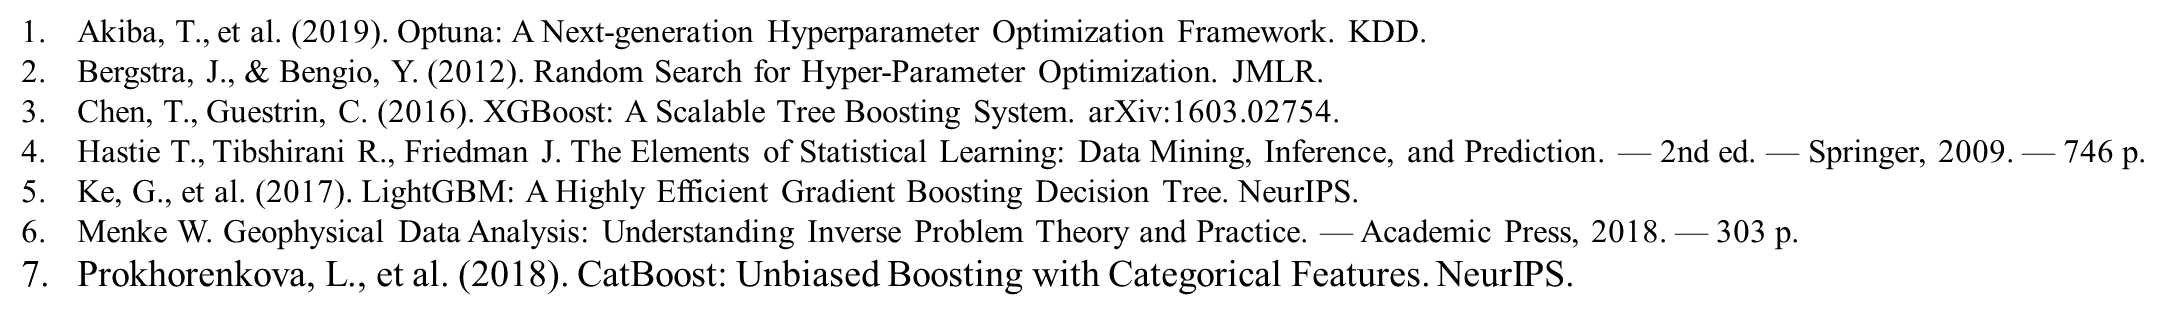
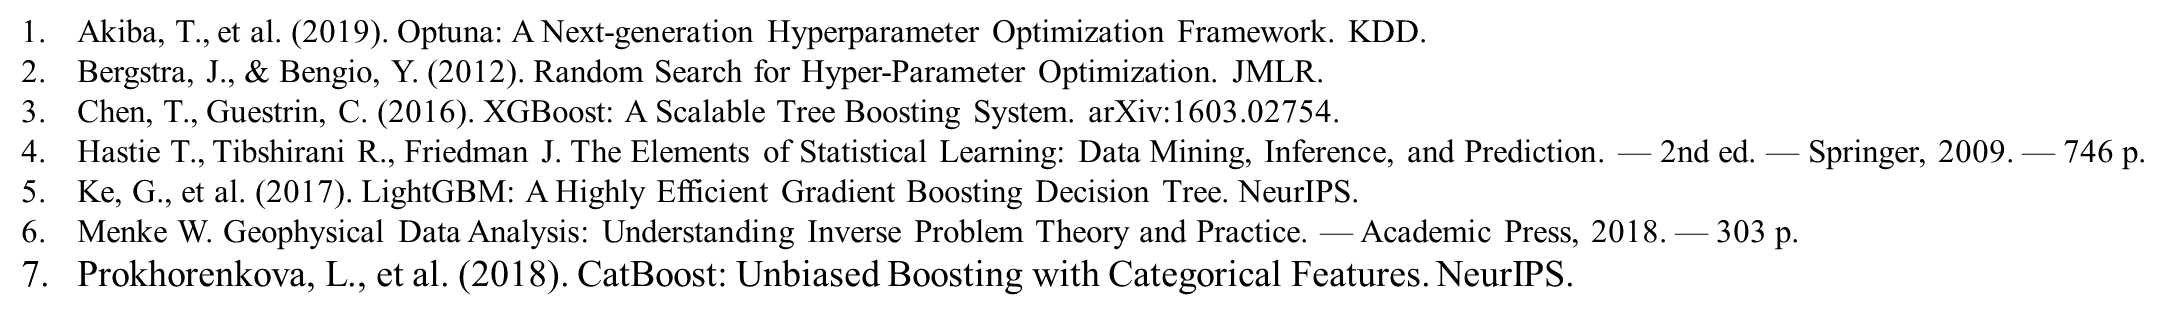
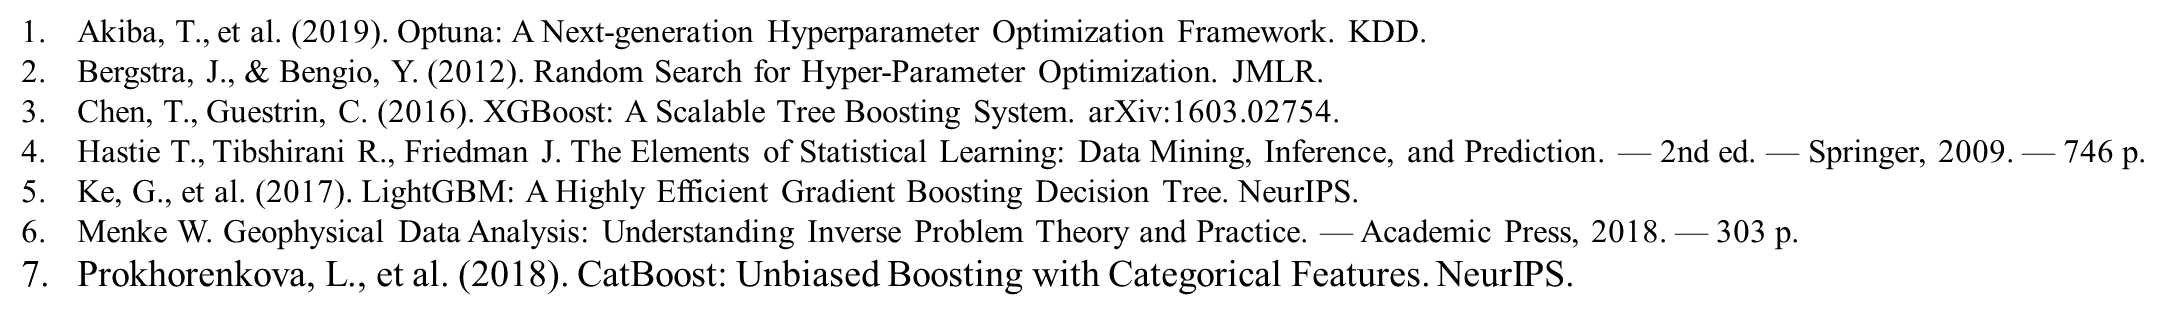
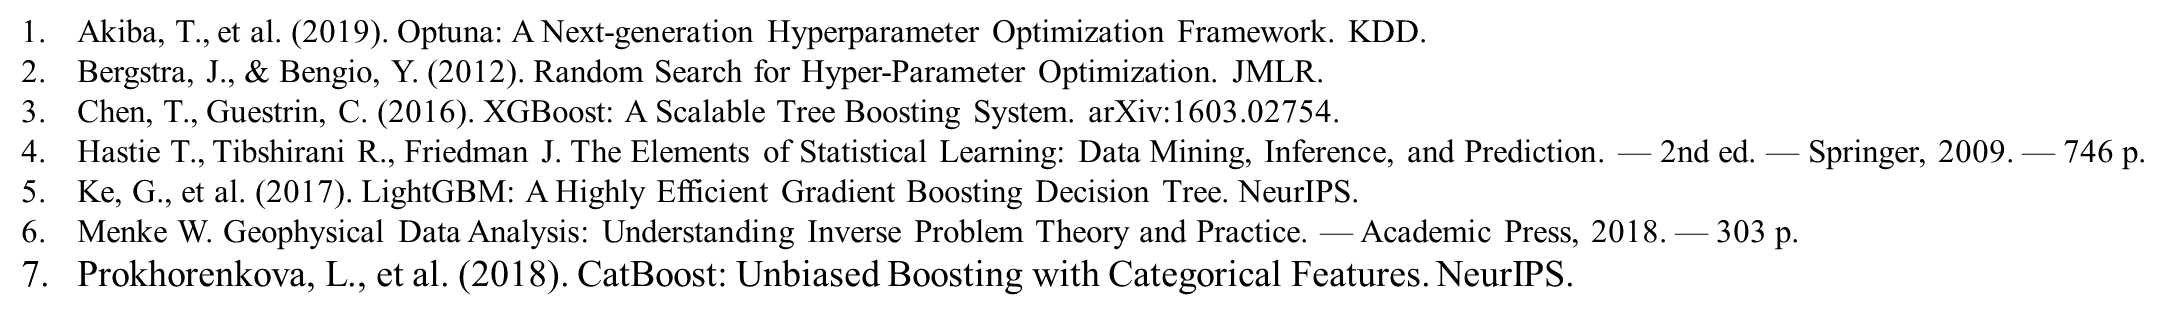
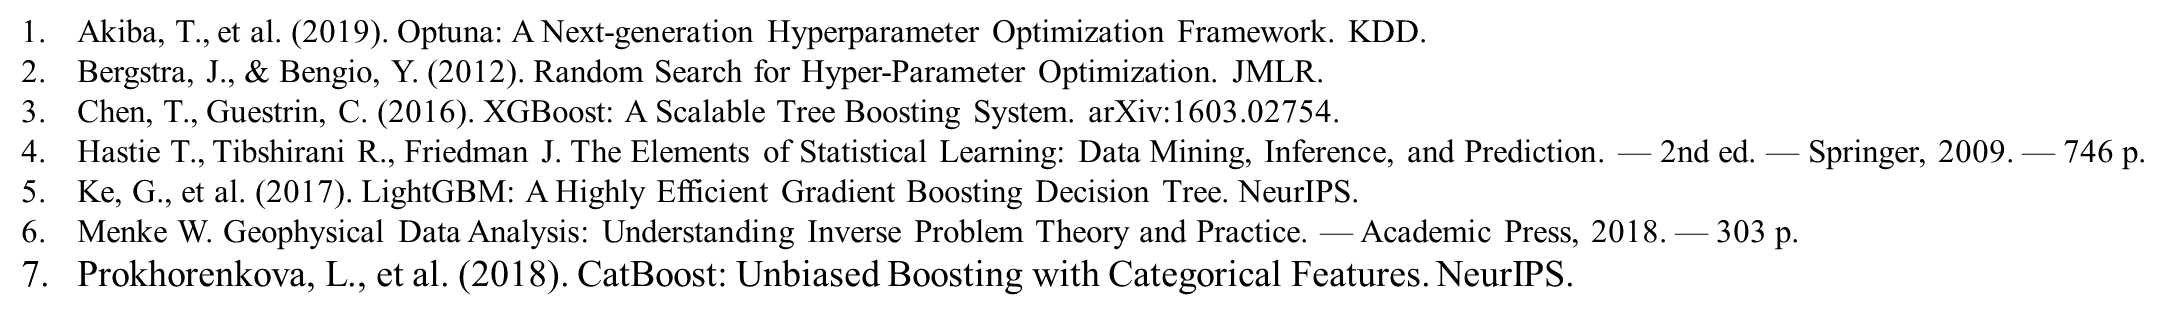
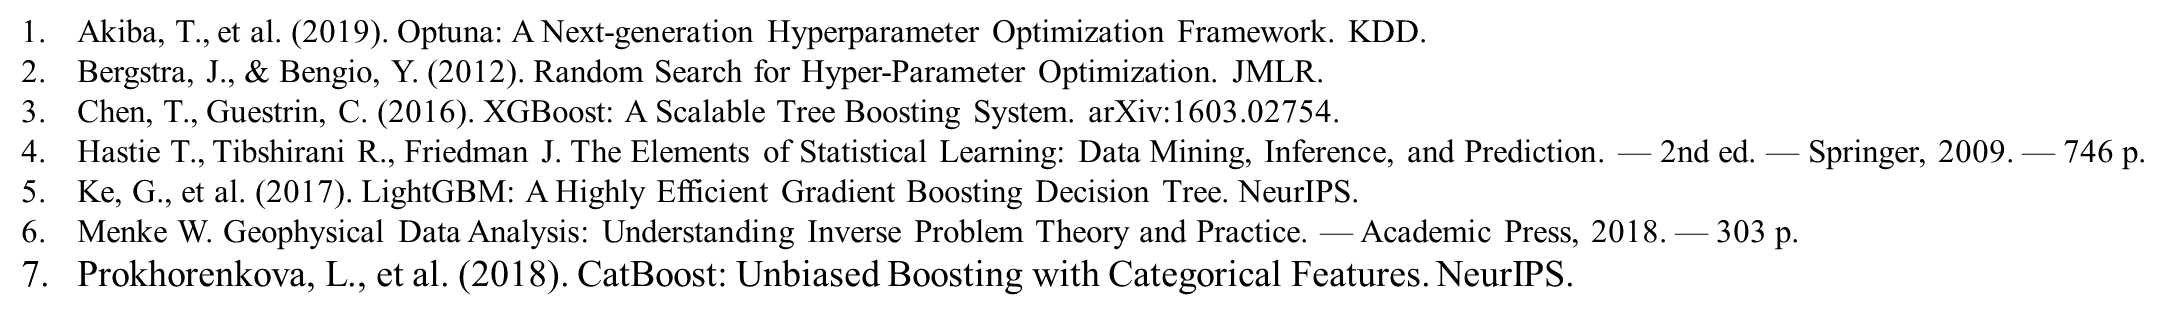
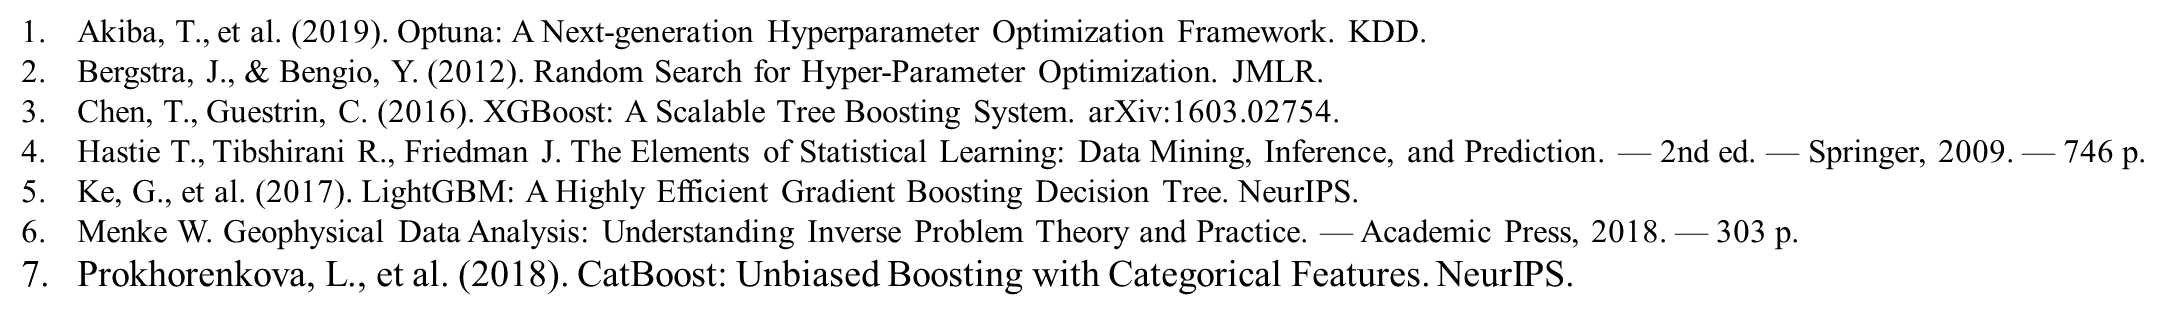

The position of the validation site (site 1 - Yenisei-Khatanga regional trough), indicating the anomaly-forming objects and their depth. The black dots indicate the positions of the wells where the GIS complex of works has been performed. There are only 4 wells on the site.


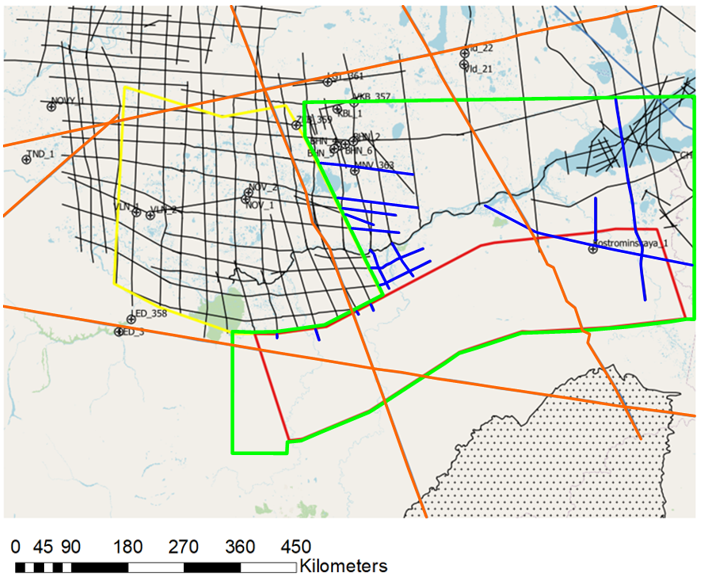

In [14]:
Image("/kaggle/input/image-2/Izuchennost.png")

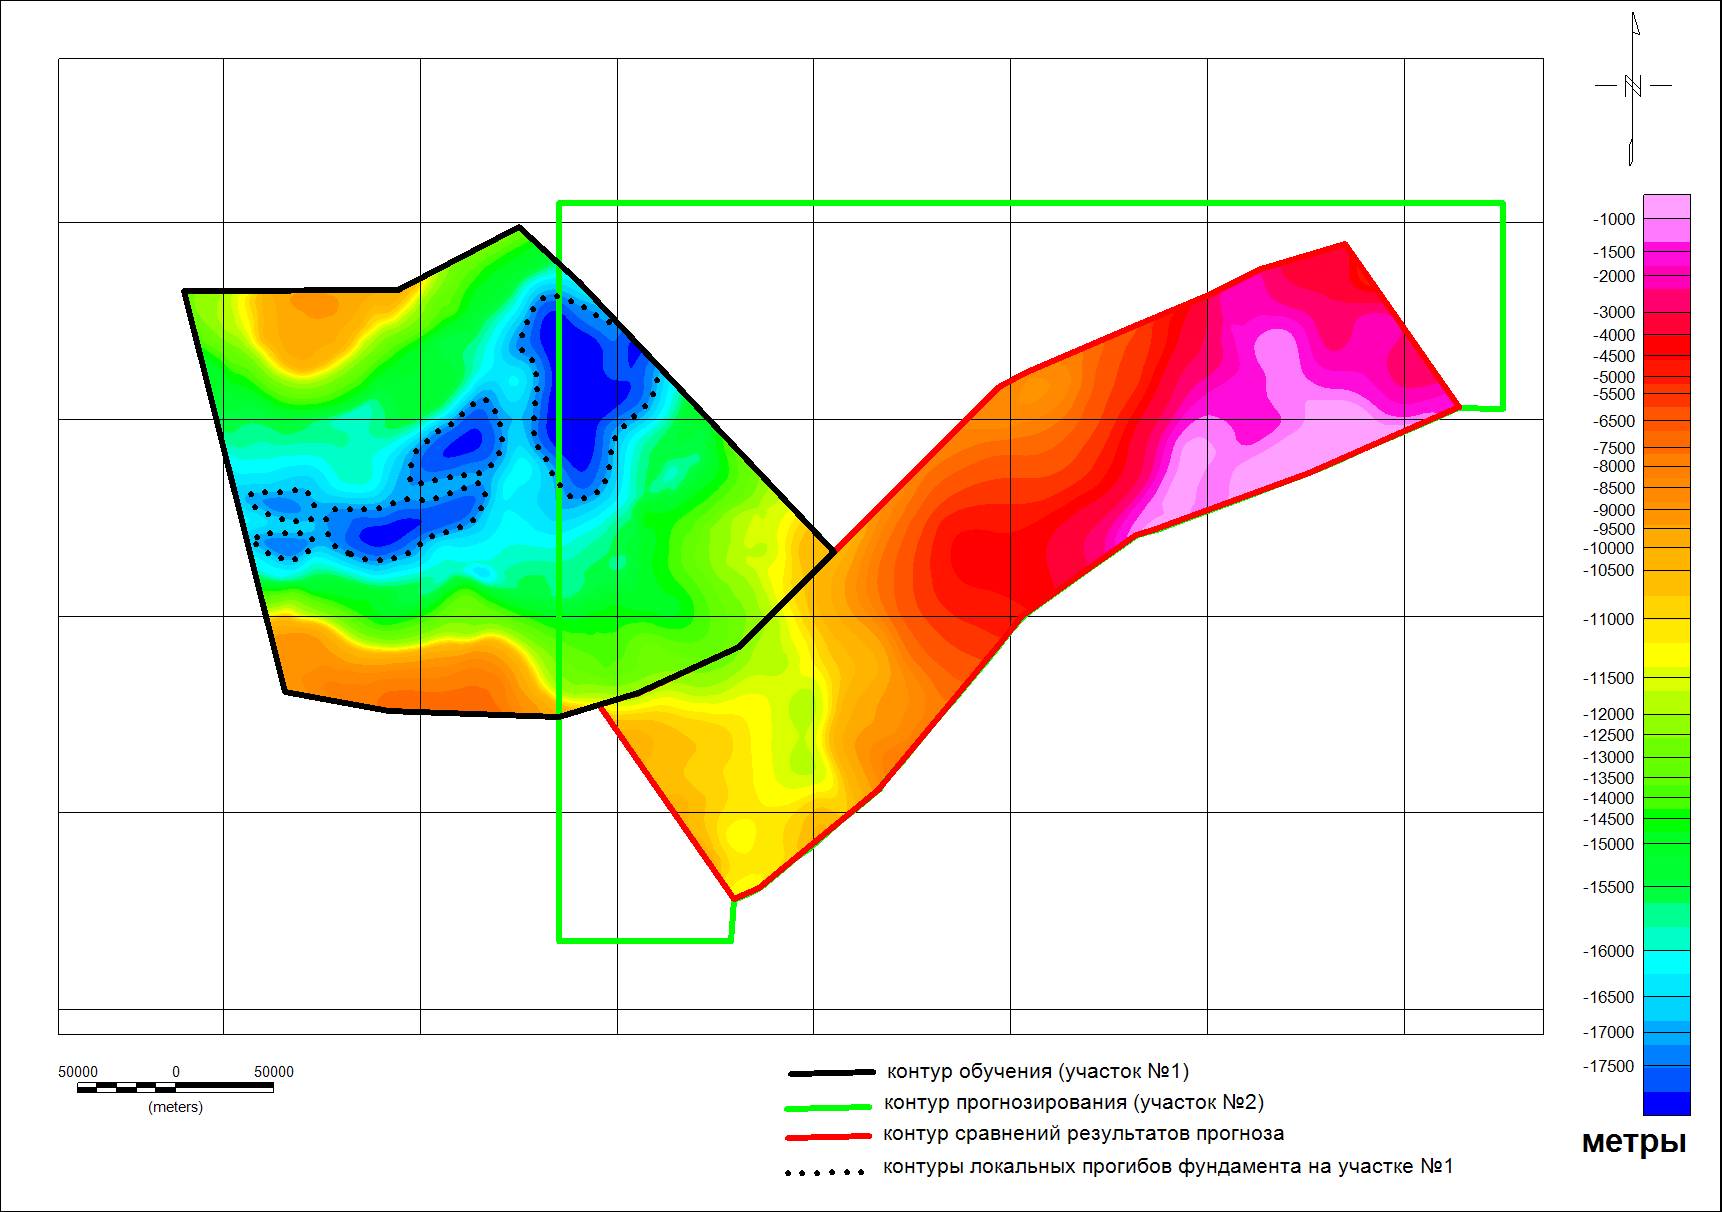

In [58]:
Image("/kaggle/input/image-2/FactFoundation.png")

In [19]:
path = '/kaggle/input/train-valid-kar-with-target/Train_Valid_GIS.csv'

In [20]:
df_kar = pd.read_csv(path, delimiter = ';')

In [21]:
df_kar.head()

DEPTH     PZ      PS     NGK       GZ3      GK          DS  Number  Depth
0  52,6   87,107   7,743   1,592   111,635    5,16   548,088       1   7100
1  52,7  87,5785  8,0699  1,5128  112,0022  4,9372  538,2395       1   7100
2  52,8    88,05   8,467   1,416   113,208   4,783   527,962       1   7100
3  52,9  88,6626  9,0489  1,3895  115,4847  4,8641  519,0369       1   7100
4    53   89,308   9,462   1,396   117,925   4,972   510,352       1   7100

In [22]:
df_kar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115784 entries, 0 to 115783
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   DEPTH   115784 non-null  object
 1   PZ      115784 non-null  object
 2    PS     115784 non-null  object
 3    NGK    115784 non-null  object
 4    GZ3    115784 non-null  object
 5    GK     115784 non-null  object
 6   DS      115784 non-null  object
 7   Number  115784 non-null  int64 
 8   Depth   115784 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 8.0+ MB


In [23]:
df_kar.columns = df_kar.columns.str.replace(' ', '')

In [24]:
df_kar.columns

Index(['DEPTH', 'PZ', 'PS', 'NGK', 'GZ3', 'GK', 'DS', 'Number', 'Depth'], dtype='object')

In [25]:
for i in df_kar.drop(columns = ['Number', 'Depth']).columns:
    df_kar[i] = df_kar[i].str.replace(',', '.')

df_kar.head()

DEPTH       PZ      PS     NGK       GZ3      GK        DS  Number  Depth
0  52.6   87.107   7.743   1.592   111.635    5.16   548.088       1   7100
1  52.7  87.5785  8.0699  1.5128  112.0022  4.9372  538.2395       1   7100
2  52.8    88.05   8.467   1.416   113.208   4.783   527.962       1   7100
3  52.9  88.6626  9.0489  1.3895  115.4847  4.8641  519.0369       1   7100
4    53   89.308   9.462   1.396   117.925   4.972   510.352       1   7100

In [26]:
df_kar['DEPTH'] = df_kar['DEPTH'].astype('float32')
df_kar['PZ'] = df_kar['PZ'].astype('float32')
df_kar['PS'] = df_kar['PS'].astype('float32')
df_kar['NGK'] = df_kar['NGK'].astype('float32')
df_kar['GZ3'] = df_kar['GZ3'].astype('float32')
df_kar['GK'] = df_kar['GK'].astype('float32')
df_kar['DS'] = df_kar['DS'].astype('float32')
df_kar['Depth'] = df_kar['Depth'].astype('float32')

In [27]:
df_kar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115784 entries, 0 to 115783
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DEPTH   115784 non-null  float32
 1   PZ      115784 non-null  float32
 2   PS      115784 non-null  float32
 3   NGK     115784 non-null  float32
 4   GZ3     115784 non-null  float32
 5   GK      115784 non-null  float32
 6   DS      115784 non-null  float32
 7   Number  115784 non-null  int64  
 8   Depth   115784 non-null  float32
dtypes: float32(8), int64(1)
memory usage: 4.4 MB


In [28]:
df_kar.describe().T

count         mean          std          min          25%  \
DEPTH   115784.0  1634.064941   905.063232    21.799999   878.475006   
PZ      115784.0    37.724396    41.935734     0.000000    15.483925   
PS      115784.0    74.324379    29.724911    -0.755000    51.486176   
NGK     115784.0     1.579963     0.293073     0.906000     1.371000   
GZ3     115784.0    49.763733    84.589157  -145.018707    13.333000   
GK      115784.0     7.304012     2.385415     0.406000     5.742600   
DS      115784.0   252.485901   137.521454   -21.761999   198.229996   
Number  115784.0     2.314845     1.045804     1.000000     1.000000   
Depth   115784.0  8930.037109  1221.798584  7100.000000  7100.000000   

                50%           75%           max  
DEPTH   1602.099976   2346.199951   3474.399902  
PZ        25.148001     40.626999    365.931000  
PS        76.911747     94.191126    163.556793  
NGK        1.603900      1.758425      3.484000  
GZ3       25.826350     51.887001   1191.037964  
GK         7.651000      9.085000     14.782000  
DS       274.653992    301.078041    824.817993  
Number     2.000000      3.000000      4.000000  
Depth   9800.000000  10000.000000  10000.000000

In [29]:
df_kar['Title'] = df_kar['Number'].replace({1: 'Волочанская1', 2: 'Волочанская2', 3: 'Новая1', 4: 'Новая2'})

In [30]:
df_kar['Title']

0         Волочанская1
1         Волочанская1
2         Волочанская1
3         Волочанская1
4         Волочанская1
              ...     
115779          Новая2
115780          Новая2
115781          Новая2
115782          Новая2
115783          Новая2
Name: Title, Length: 115784, dtype: object

In [31]:
wells_order = ['Волочанская1', 'Волочанская2', 'Новая1', 'Новая2']
params = ['PZ', 'PS', 'NGK', 'GZ3', 'GK', 'DS']


fig = make_subplots(
    rows=4,
    cols=6,
    subplot_titles=[f"{param} - {well}" for well in wells_order for param in params],
    vertical_spacing=0.05,
    horizontal_spacing=0.05
)

for i, well in enumerate(wells_order, 1):
    for j, param in enumerate(params, 1):
        data = df_kar[df_kar['Title'] == well]
        fig.add_trace(go.Scatter(x=data[param],
                                 y=data['DEPTH'],
                                 mode='lines',
                                 showlegend=False),
                      row=i,
                      col=j)

for i in range(1, 5):
    for j in range(1, 7):
        fig.update_yaxes(autorange="reversed", row=i, col=j)

# Настройка общего вида
fig.update_layout(height=2000,
                  width=2000,
                  title_text="Logging curves of the training sample",
                  margin=dict(t=100))

fig.show(renderer='iframe')

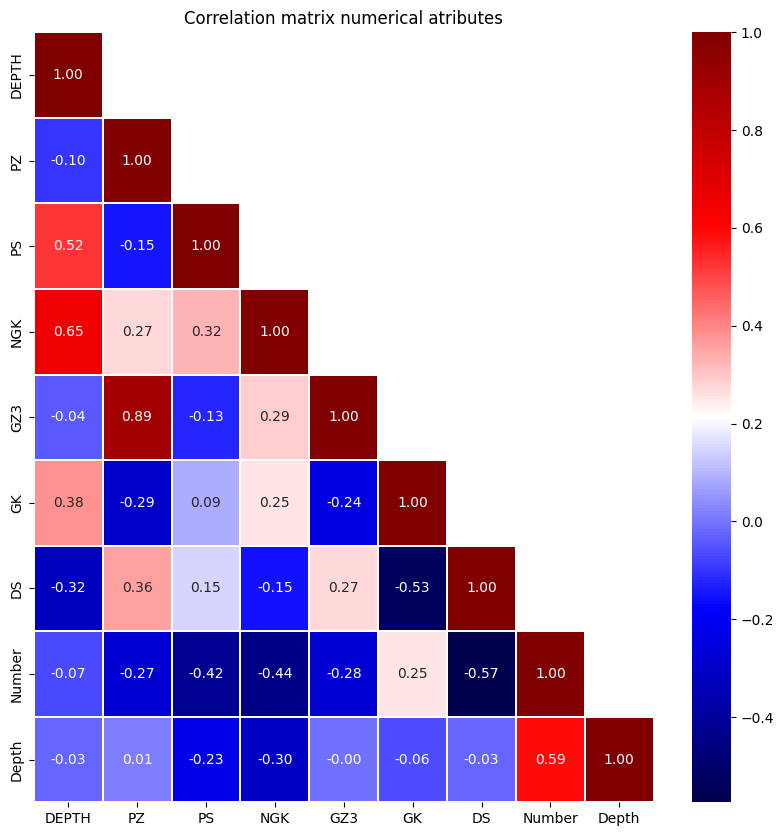

In [32]:
correlation_matrix = df_kar.drop(columns = ['Title']).corr(numeric_only = True)
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool), k=1)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt=".2f", linewidths=.1, mask = mask)
plt.title('Correlation matrix numerical atributes')
plt.show()

In [33]:
# Параметры визуализации
methods = ['PZ', 'PS', 'NGK', 'GZ3', 'GK', 'DS']
wells = df_kar['Title'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Создание сетки графиков
fig = make_subplots(
    rows=len(wells),
    cols=len(methods),
    subplot_titles=[f"{well}/{method}" for well in wells for method in methods],
    vertical_spacing=0.05,
    horizontal_spacing=0.02
)

# Заполнение сетки данными
for row_idx, well in enumerate(wells, 1):
    well_data = df_kar[df_kar['Title'] == well]

    for col_idx, method in enumerate(methods, 1):
        fig.add_trace(
            go.Histogram(
                x=well_data[method],
                name=method,
                marker_color=colors[row_idx-1],
                opacity=0.7,
                nbinsx=30
            ),
            row=row_idx,
            col=col_idx
        )

fig.update_layout(
    height=2000,
    width=2400,
    title_text="Distribution of GIS methods by wells",
    bargap=0.05,
    margin=dict(t=100),
    showlegend=False
)

fig.update_xaxes(title_text="Parameter Value", title_font=dict(size=8))
fig.update_yaxes(title_text="Frequency", title_font=dict(size=8))

for i in range(len(wells)*len(methods)):
    fig.update_xaxes(matches=None, showticklabels=True, row=(i//6)+1, col=(i%6)+1)
    fig.update_yaxes(matches=None, showticklabels=True)

fig.show(renderer='iframe')

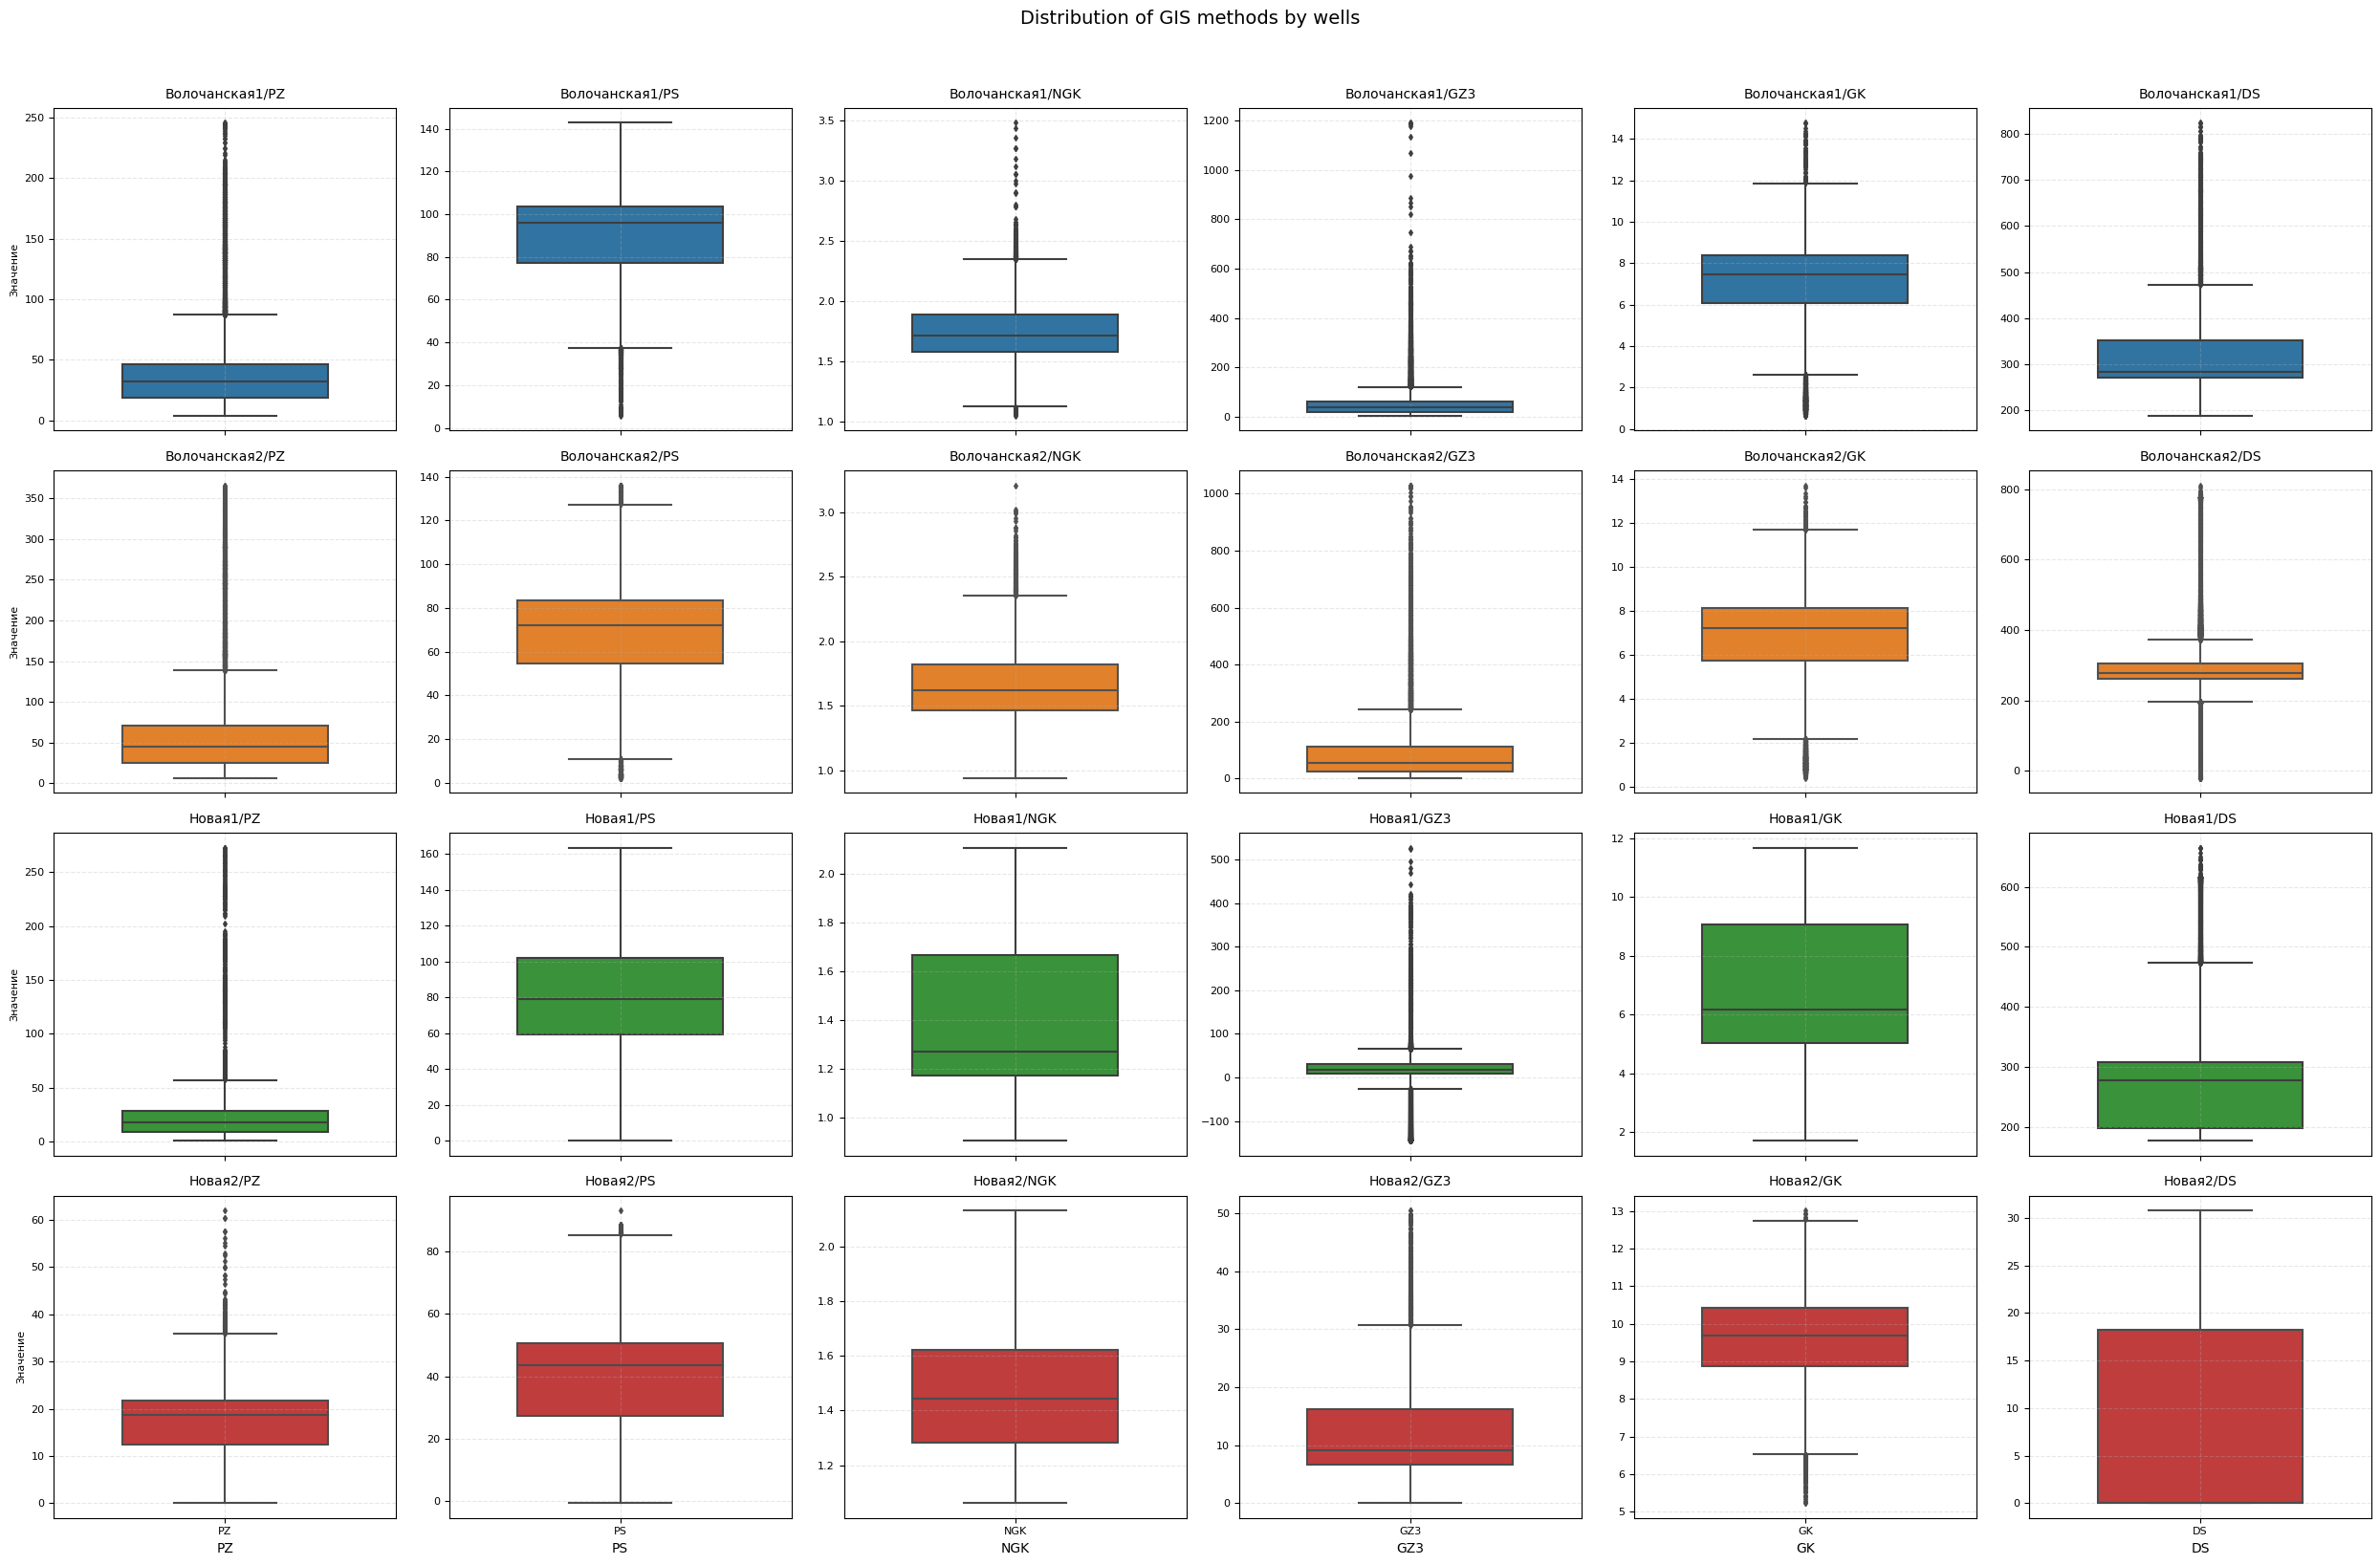

In [34]:
# Подготовка данных
methods = ['PZ', 'PS', 'NGK', 'GZ3', 'GK', 'DS']
wells = df_kar['Title'].unique()
df_melted = df_kar.melt(id_vars=['Title', 'DEPTH', 'Depth'], value_vars=methods, var_name='Method', value_name='Value')

# Создание сетки графиков
n_rows = len(wells)
n_cols = len(methods)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 4*len(wells)), sharex='col')

# Цветовая схема
palette = {'Волочанская1': '#1f77b4', 'Волочанская2': '#ff7f0e', 'Новая1': '#2ca02c', 'Новая2': '#d62728'}

# Построение графиков
for row_idx, well in enumerate(wells):
    for col_idx, method in enumerate(methods):
        ax = axes[row_idx, col_idx]
        data_subset = df_melted[(df_melted['Title'] == well) & (df_melted['Method'] == method)]

        sns.boxplot(x='Method', y='Value', data=data_subset, ax=ax, color=palette[well], width=0.6, fliersize=3)

        # Настройка заголовка и подписей
        ax.set_title(f"{well}/{method}", fontsize=10, pad=8)
        ax.set_xlabel('') if row_idx != len(wells)-1 else ax.set_xlabel(method)
        ax.set_ylabel('Значение', fontsize=8) if col_idx == 0 else ax.set_ylabel('')

        # Форматирование осей
        ax.tick_params(axis='both', labelsize=8)
        ax.grid(True, linestyle='--', alpha=0.3)

# Общая настройка
plt.suptitle('Distribution of GIS methods by wells', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

In [35]:
train_columns = ['DEPTH', 'PZ', 'PS', 'NGK', 'GZ3', 'GK', 'DS', 'Number']
X = df_kar[train_columns]
target_column = ['Depth']
y = df_kar[target_column]

In [36]:
mutual_df = X.drop(columns = ['Number', 'DEPTH'])
mutual_info = mutual_info_regression(mutual_df, y, random_state= 42)
mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Mutual_Info_Regression"] ).style.background_gradient("rainbow")

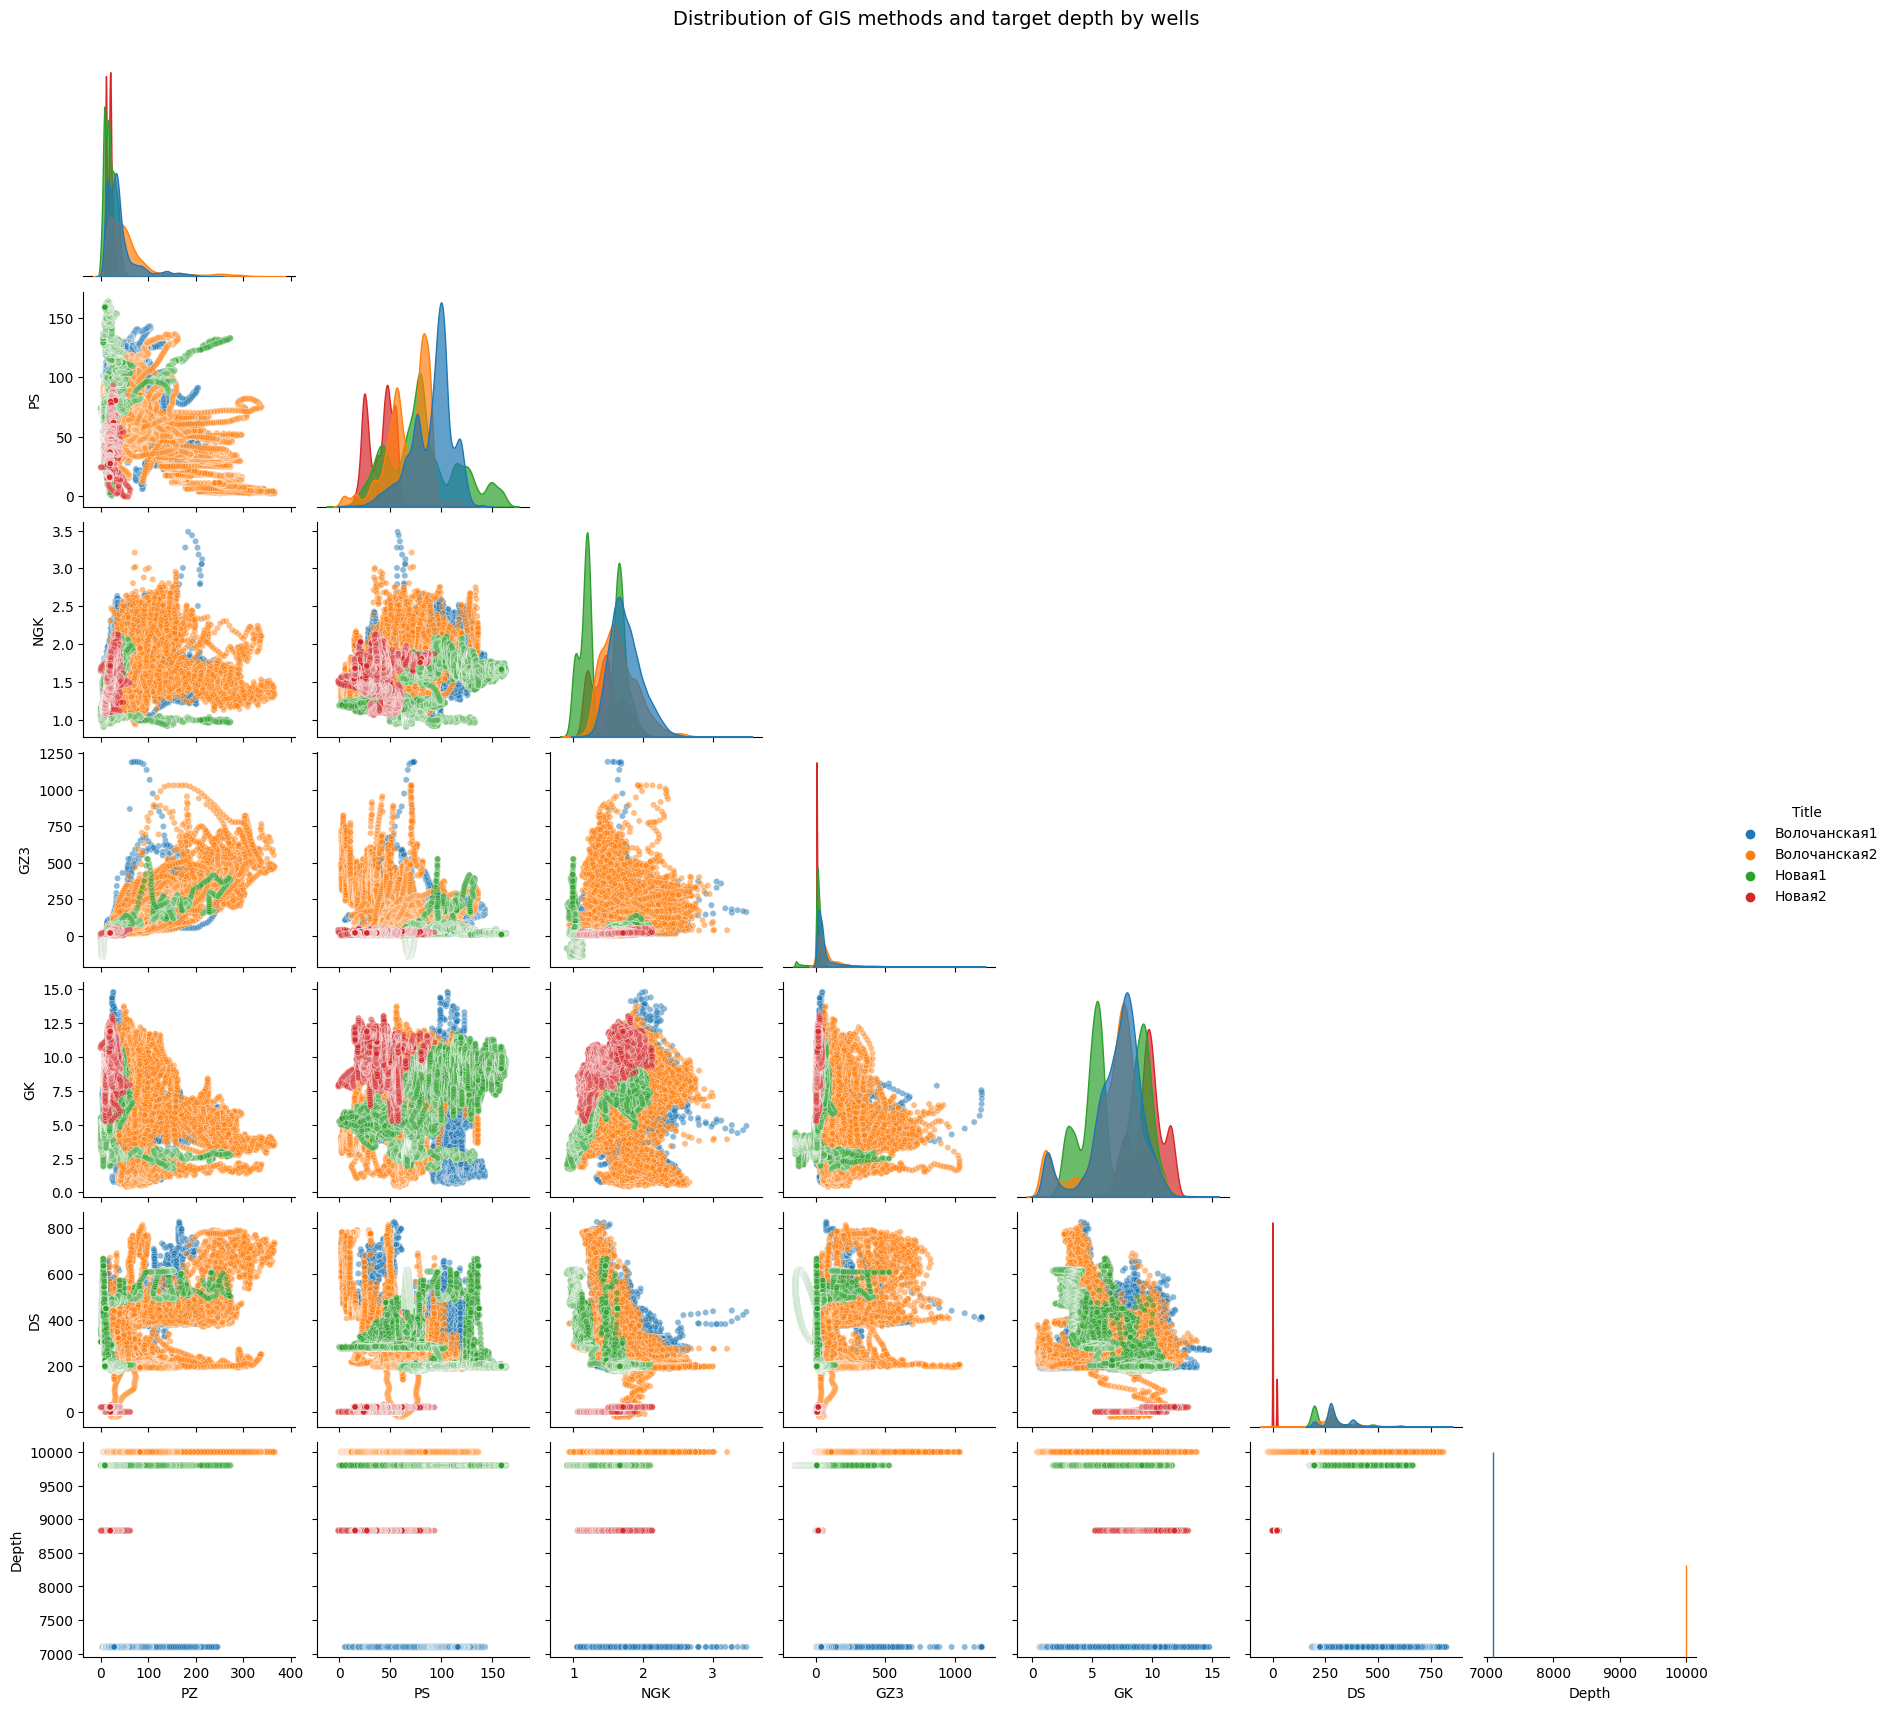

In [37]:
features = ['PZ', 'PS', 'NGK', 'GZ3', 'GK', 'DS', 'Depth']
g = sns.pairplot(data=df_kar,
                 vars=features,
                 hue='Title',
                 palette='tab10',
                 corner=True,
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7})
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Distribution of GIS methods and target depth by wells', fontsize=14)
plt.show()

In [38]:
scaler = ColumnTransformer(transformers=[('robust', RobustScaler(), ['DEPTH', 'PZ', 'PS', 'GZ3', 'DS']),  # Признаки с большим разбросом
                                         ('standard', StandardScaler(), ['NGK', 'GK'])      # Признаки в малом диапазоне
                                        ], remainder='passthrough')  # Остальные признаки
X = X.drop(columns = 'Number')
X_scaled = scaler.fit_transform(X)
column_scaler = (['DEPTH', 'PZ', 'PS', 'GZ3', 'DS'] + ['NGK', 'GK'] + [col for col in X.columns if col not in ['DEPTH', 'PZ', 'PS', 'GZ3', 'DS', 'NGK', 'GK']])
X_scaled = pd.DataFrame(X_scaled, columns=column_scaler)

In [39]:
X_scaled.head()

DEPTH        PZ        PS       GZ3        DS       NGK        GK
0 -1.055716  2.464257 -1.619689  2.225674  2.658622  0.041072 -0.898821
1 -1.055647  2.483010 -1.612034  2.235198  2.562864 -0.229165 -0.992224
2 -1.055579  2.501763 -1.602736  2.266474  2.462934 -0.559455 -1.056869
3 -1.055511  2.526127 -1.589110  2.325527  2.376155 -0.649875 -1.022869
4 -1.055443  2.551796 -1.579436  2.388822  2.291711 -0.627696 -0.977635

In [40]:
X_scaled.shape, y.shape

((115784, 7), (115784, 1))

## Data Loading from Site №1 (Validation Dataset)  

This dataset contains geophysical measurements and derived transformations for validation purposes. Below is the detailed description of its components:

---

## **Dataset Features**  

### 1. **Anomalous Magnetic and Gravity Fields**  
- **Columns**: `Mag`, `Grav`  
- **What it means**: processed values in the matrix nodes obtained during aeromagnetic and aerograviation surveys 

### 2. **Upward-Continued Magnetic and Gravity Fields**  
- **Columns**: `Mag_UP5km`, `Mag_UP20km`, `Grav_UP5km`, `Grav_UP20km`  
- **What it means**: Magnetic and gravitational anomalies recalculated to upper half-space at **5 km** and **20 km** altitudes.  
- *Upward continuation* simulates how the field would appear at higher elevations, filtering out shallow noise.  

### 3. **Tilt-Transformed Magnetic and Gravity Fields**  
- **Columns**: `Mag_Tilt`, `Grav_Tilt`  
- **What it means**: Tilt transformation highlights edges of anomalous bodies by normalizing gradients.  

### 4. **Upward-Continued Tilt Transformations**  
- **Columns**: `Mag_Tilt_UP1km`, `Mag_Tilt_UP5km`, `Grav_Tilt_UP1km`, `Grav_Tilt_UP5km`  
- **What it means**: Tilt-transformed fields recalculated at **1 km** and **5 km** altitudes to enhance deeper structures.  

### 5. **Vertical Derivatives of Magnetic and Gravity Fields**  
- **Columns**: `Mag_Vz`, `Grav_Vz`  
- **What it means**: Vertical gradients emphasize short-wavelength anomalies (shallow sources).  

### 6. **Full Gradients of Magnetic and Gravity Fields**  
- **Columns**: `Mag_FG_10km`, `Mag_FG_30km`, `Grav_FG_10km`, `Grav_FG_30km`  
- **What it means**: Magnitude of total gradient (vector sum of derivatives) recalculated at **10 km** and **30 km** altitudes.  
- *Full gradients* help to emphasize the effects of ancient lineaments..  

### 7. **Analytic Signal of Magnetic and Gravity Fields**  
- **Columns**: `Mag_AnalSignal`, `Grav_AnalSignal`  
- **What it means**: Analytic signal combines horizontal and vertical derivatives to detect edges of sources independent of magnetization direction.  

### 8. **Basement Effect of Magnetic and Gravity Fields**  
- **Columns**: `Mag_Bass_Effect`, `Grav_Base_Effect`  
- **What it means**: Contributions from the crystalline basement (deep crustal layer) to observed anomalies.  

### 9. **Moho Depth**  
- **Column**: `Moho`  
- **What it means**: Depth to the **Mohorovičić discontinuity**, the boundary between Earth's crust and mantle.  

### 10. **Earth's Surface Relief**  
- **Column**: `Relief`  
- **What it means**: Topographic elevation data (surface terrain).  

### 11. **Depths of Anomaly-Forming Objects**  
- **Column**: `Target`  
- **What it means**: True depths of geological structures causing anomalies (used for validation).  

---

## **Notes**  
- **Column names in parentheses** (e.g., `Mag`, `Grav`) correspond to the actual headers in the dataset.  
- **UPXkm** denotes upward continuation to altitude **X km**.  
- **FG_Xkm** indicates full gradient calculated at altitude **X km**.  
- **Tilt** transformations and **Analytic Signal** are edge-detection filters.  

In [41]:
path_pot_fileds = '/kaggle/input/train-valid-potential-fields/Train_Valid_Potential_Fields.csv'

In [42]:
df_mg = pd.read_csv(path_pot_fileds, delimiter = ';')
df_mg.head()

X            Y           Mag        Mag_Vz   Mag_UP20km    Mag_UP5km  \
0  397000  7833492,063   126,1168592   0,134732462  134,4483366  81,84470796   
1  399000  7833492,063  -55,00307666  -0,166998586  133,3200034  78,79680537   
2  401000  7833492,063   -72,3595661  -0,160221776  132,4967089  80,59210787   
3  403000  7833492,063   134,9710749   0,127228167  131,9403974  85,92101439   
4  405000  7833492,063   51,25060787  -0,000778408  131,6050092  90,05772005   

  Mag_Tilt_UP5km Mag_Tilt_UP1km      Mag_Tilt   Mag_FG_30km  ...  \
0   -0,117606464    0,117166457   1,346100918   64,64747657  ...   
1     -0,1399572   -0,240905345  -0,733161035  -115,3170758  ...   
2   -0,144346748   -0,389259637  -1,079924371  -135,7811235  ...   
3   -0,130442492    0,022256078    0,93000266   64,99683118  ...   
4   -0,118931512   -0,243264396   0,003447346  -26,19073462  ...   

  Grav_Tilt_UP5km Grav_Tilt_UP1km     Grav_Tilt  Grav_FG_30km  Grav_FG_10km  \
0    -0,351314296    -0,798195038   -1,07043937  -0,686431317  -0,187184942   
1    -0,337654864    -0,927385617  -1,405542068  -1,186250851  -0,433216866   
2    -0,291617987    -0,711303436   -1,03674293  -0,909737035   -0,35617589   
3    -0,225938483    -0,172578475  -0,025324919   0,163236151   0,134518093   
4    -0,182273181     0,129186642   0,752698884   0,655591767   0,276211571   

  Grav_AnalSignal Grav_BaseEffect          Moho       Relief        Target  
0     0,000665946     427,3821778  -40735,93097  85,03050406    -7842,0273  
1     0,000970676     425,6882782  -40670,80286  86,25801021  -7723,948661  
2     0,000947749     424,1129589  -40603,36095  75,67649392  -7592,480262  
3     0,000594824     422,6168898  -40533,93686  71,67238371  -7419,981454  
4     0,000382936     421,1623784   -40462,8093  90,80160193  -7315,398814  

[5 rows x 27 columns]

In [43]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13411 entries, 0 to 13410
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   X                13411 non-null  int64 
 1   Y                13411 non-null  object
 2   Mag              13411 non-null  object
 3   Mag_Vz           13411 non-null  object
 4   Mag_UP20km       13411 non-null  object
 5   Mag_UP5km        13411 non-null  object
 6   Mag_Tilt_UP5km   13411 non-null  object
 7   Mag_Tilt_UP1km   13411 non-null  object
 8   Mag_Tilt         13411 non-null  object
 9   Mag_FG_30km      13411 non-null  object
 10  Mag_FG_10km      13411 non-null  object
 11  Mag_AnalSignal   13411 non-null  object
 12  Mag_BaseEffect   13411 non-null  object
 13  Grav             13411 non-null  object
 14  Grav_Vz          13411 non-null  object
 15  Grav_UP20km      13411 non-null  object
 16  Grav_UP5km       13411 non-null  object
 17  Grav_Tilt_UP5km  13411 non-null

**object -> float64**

In [44]:
cols_to_convert = df_mg.columns.difference(['X'])

for col in cols_to_convert:
    df_mg[col] = df_mg[col].str.replace(',', '.').astype('float64')

df_mg['X'] = df_mg['X'].astype('float64')

print(df_mg.dtypes)

X                  float64
Y                  float64
Mag                float64
Mag_Vz             float64
Mag_UP20km         float64
Mag_UP5km          float64
Mag_Tilt_UP5km     float64
Mag_Tilt_UP1km     float64
Mag_Tilt           float64
Mag_FG_30km        float64
Mag_FG_10km        float64
Mag_AnalSignal     float64
Mag_BaseEffect     float64
Grav               float64
Grav_Vz            float64
Grav_UP20km        float64
Grav_UP5km         float64
Grav_Tilt_UP5km    float64
Grav_Tilt_UP1km    float64
Grav_Tilt          float64
Grav_FG_30km       float64
Grav_FG_10km       float64
Grav_AnalSignal    float64
Grav_BaseEffect    float64
Moho               float64
Relief             float64
Target             float64
dtype: object


**Fillna Moho Values**

In [45]:
mode_value = df_mg['Moho'].mode()[0]

df_mg['Moho'] = df_mg['Moho'].fillna(mode_value)

print('Moho Null Values:', df_mg['Moho'].isnull().sum())

Moho Null Values: 0


In [46]:
mode_value_TG = df_mg['Target'].mode()[0]

df_mg['Target'] = df_mg['Target'].fillna(mode_value_TG)

print('Target Null Values:', df_mg['Target'].isnull().sum())

Target Null Values: 0


In [47]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13411 entries, 0 to 13410
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                13411 non-null  float64
 1   Y                13411 non-null  float64
 2   Mag              13411 non-null  float64
 3   Mag_Vz           13411 non-null  float64
 4   Mag_UP20km       13411 non-null  float64
 5   Mag_UP5km        13411 non-null  float64
 6   Mag_Tilt_UP5km   13411 non-null  float64
 7   Mag_Tilt_UP1km   13411 non-null  float64
 8   Mag_Tilt         13411 non-null  float64
 9   Mag_FG_30km      13411 non-null  float64
 10  Mag_FG_10km      13411 non-null  float64
 11  Mag_AnalSignal   13411 non-null  float64
 12  Mag_BaseEffect   13411 non-null  float64
 13  Grav             13411 non-null  float64
 14  Grav_Vz          13411 non-null  float64
 15  Grav_UP20km      13411 non-null  float64
 16  Grav_UP5km       13411 non-null  float64
 17  Grav_Tilt_UP

In [48]:
df_mg.drop(columns = ['X', 'Y']).describe(exclude = object).T

count          mean          std           min  \
Mag              13411.0    187.552860   377.316821  -2585.684111   
Mag_Vz           13411.0      0.002354     0.082454     -1.889054   
Mag_UP20km       13411.0    159.178034   105.504073    -84.357683   
Mag_UP5km        13411.0    177.928200   239.379910   -726.464653   
Mag_Tilt_UP5km   13411.0     -0.126470     0.390772     -0.976712   
Mag_Tilt_UP1km   13411.0     -0.124747     0.625962     -1.361134   
Mag_Tilt         13411.0     -0.121471     0.795135     -1.542387   
Mag_FG_30km      13411.0      1.840256   115.818596  -1794.207898   
Mag_FG_10km      13411.0      0.256969    43.131339  -1091.779883   
Mag_AnalSignal   13411.0      0.055803     0.101789      0.001671   
Mag_BaseEffect   13411.0     74.190764   151.010388   -203.918674   
Grav             13411.0      3.225805    26.668801    -49.870112   
Grav_Vz          13411.0      0.000360     0.001575     -0.003284   
Grav_UP20km      13411.0      9.713359    12.750531    -16.547071   
Grav_UP5km       13411.0     14.030963    21.543606    -29.389141   
Grav_Tilt_UP5km  13411.0      0.096881     0.541444     -1.034129   
Grav_Tilt_UP1km  13411.0      0.108997     0.752938     -1.384093   
Grav_Tilt        13411.0      0.112044     0.840770     -1.565613   
Grav_FG_30km     13411.0      0.077730     1.806037     -8.025821   
Grav_FG_10km     13411.0      0.007614     0.294426     -2.260872   
Grav_AnalSignal  13411.0      0.001860     0.001200      0.000027   
Grav_BaseEffect  13411.0    363.104339    28.637642    318.080721   
Moho             13411.0 -36161.943411  3672.916785 -45285.042550   
Relief           13411.0     58.244150    28.454767    -13.000000   
Target           13411.0 -14435.202719  2682.793922 -17944.263560   

                          25%           50%           75%           max  
Mag                -13.007741    111.702662    307.440668   2913.178847  
Mag_Vz              -0.016507     -0.003588      0.013078      1.483462  
Mag_UP20km          89.202935    160.100239    218.166302    503.940539  
Mag_UP5km           37.780523    141.914077    276.050548   1229.752857  
Mag_Tilt_UP5km      -0.435813     -0.145055      0.157456      0.807309  
Mag_Tilt_UP1km      -0.640190     -0.177069      0.361324      1.295056  
Mag_Tilt            -0.802978     -0.186218      0.545036      1.554189  
Mag_FG_30km        -21.729431     -3.223331     16.071391   2355.355337  
Mag_FG_10km         -3.522491     -0.454275      3.091866   1355.641043  
Mag_AnalSignal       0.015977      0.026316      0.054802      2.179412  
Mag_BaseEffect     -39.054115     51.818802    147.578082    652.644816  
Grav               -14.286617      1.886909     17.718626    125.624714  
Grav_Vz             -0.000777      0.000237      0.001164      0.010550  
Grav_UP20km          1.118572     10.828799     15.610790     46.616871  
Grav_UP5km           0.024269     13.366664     24.953305    101.832273  
Grav_Tilt_UP5km     -0.383179      0.150631      0.588546      1.026200  
Grav_Tilt_UP1km     -0.569441      0.198914      0.787947      1.389230  
Grav_Tilt           -0.643179      0.213392      0.857930      1.560755  
Grav_FG_30km        -0.976142     -0.000392      0.931626     17.227906  
Grav_FG_10km        -0.152658      0.001527      0.151841      3.104730  
Grav_AnalSignal      0.001089      0.001573      0.002335      0.010784  
Grav_BaseEffect    337.080777    361.570844    384.417506    437.886196  
Moho            -38770.498735 -35531.524800 -32966.631575 -30959.143640  
Relief              39.305483     52.830004     72.086416    238.142935  
Target          -16418.022660 -15315.846640 -12653.015480  -6890.853699

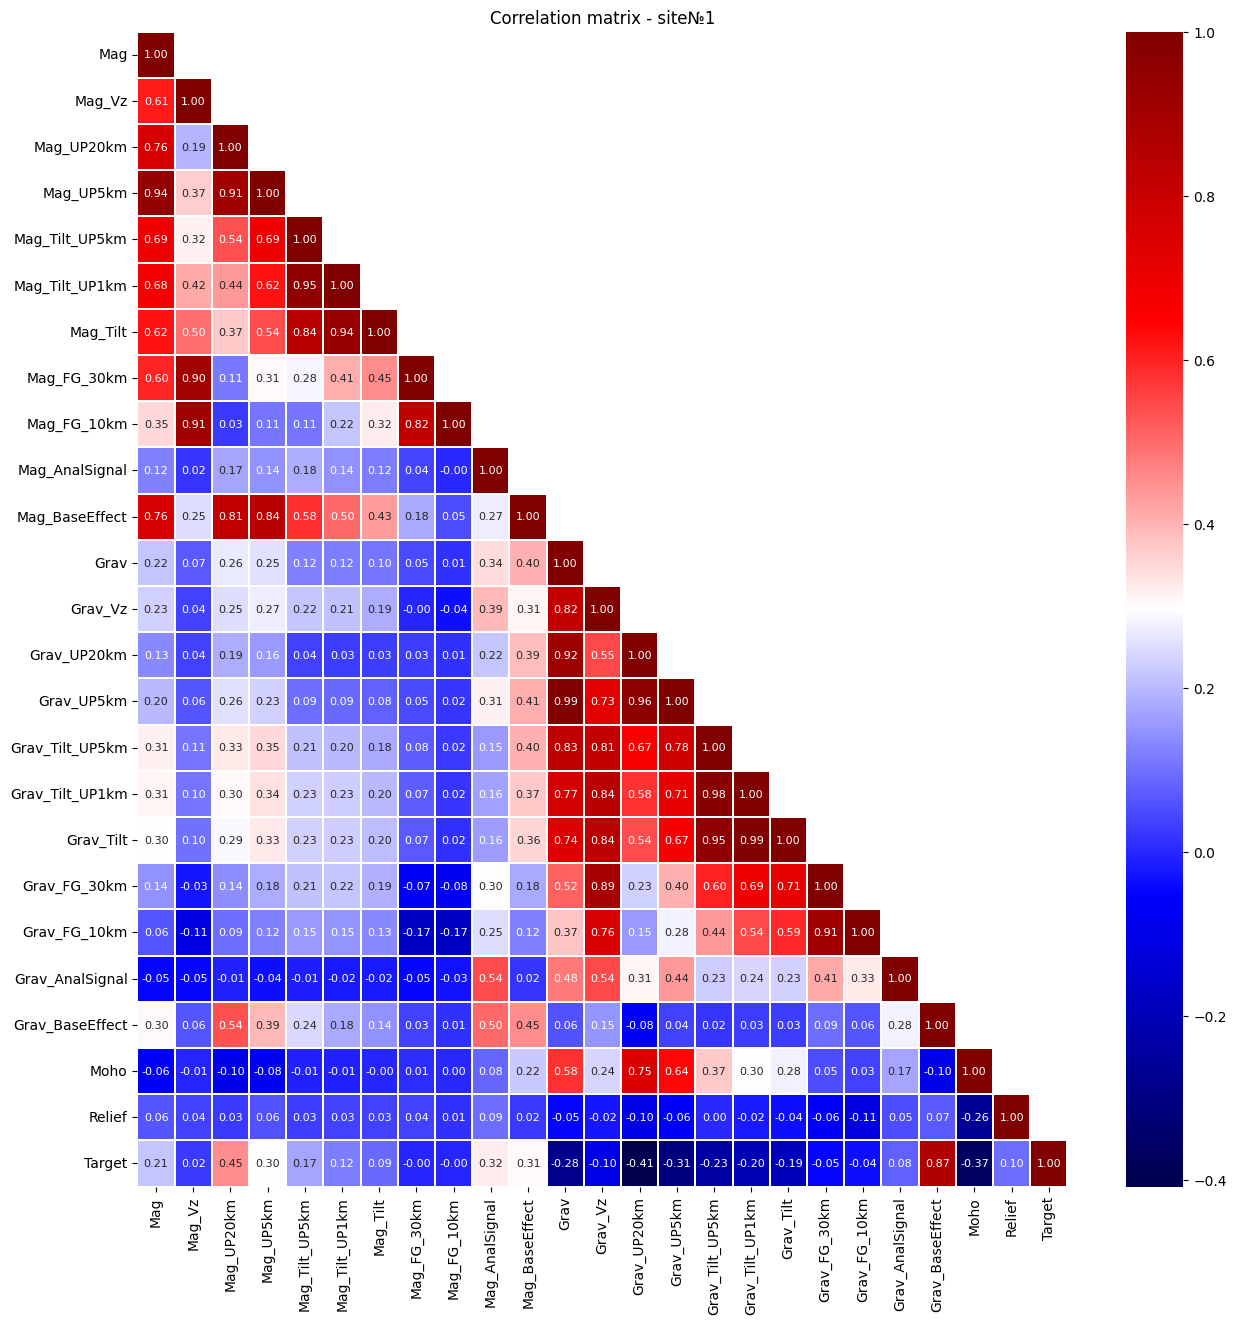

In [49]:
correlation_matrix = df_mg.drop(columns=['X', 'Y']).corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

plt.figure(figsize=(15, 15))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='seismic', 
    fmt=".2f", 
    linewidths=.1, 
    mask=mask,
    annot_kws={"size": 8} 
)
plt.title('Correlation matrix - site№1')
plt.savefig("MG_CorrMatrix.png")

In [50]:
mutual_df = df_mg.drop(columns=['X', 'Y', 'Target'])
mutual_info = mutual_info_regression(mutual_df, df_mg['Target'], random_state= 42)
mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Mutual_Info_Regression"] ).style.background_gradient("rainbow")

In [51]:
df_mg.head()

X            Y         Mag    Mag_Vz  Mag_UP20km  Mag_UP5km  \
0  397000.0  7833492.063  126.116859  0.134732  134.448337  81.844708   
1  399000.0  7833492.063  -55.003077 -0.166999  133.320003  78.796805   
2  401000.0  7833492.063  -72.359566 -0.160222  132.496709  80.592108   
3  403000.0  7833492.063  134.971075  0.127228  131.940397  85.921014   
4  405000.0  7833492.063   51.250608 -0.000778  131.605009  90.057720   

   Mag_Tilt_UP5km  Mag_Tilt_UP1km  Mag_Tilt  Mag_FG_30km  ...  \
0       -0.117606        0.117166  1.346101    64.647477  ...   
1       -0.139957       -0.240905 -0.733161  -115.317076  ...   
2       -0.144347       -0.389260 -1.079924  -135.781124  ...   
3       -0.130442        0.022256  0.930003    64.996831  ...   
4       -0.118932       -0.243264  0.003447   -26.190735  ...   

   Grav_Tilt_UP5km  Grav_Tilt_UP1km  Grav_Tilt  Grav_FG_30km  Grav_FG_10km  \
0        -0.351314        -0.798195  -1.070439     -0.686431     -0.187185   
1        -0.337655        -0.927386  -1.405542     -1.186251     -0.433217   
2        -0.291618        -0.711303  -1.036743     -0.909737     -0.356176   
3        -0.225938        -0.172578  -0.025325      0.163236      0.134518   
4        -0.182273         0.129187   0.752699      0.655592      0.276212   

   Grav_AnalSignal  Grav_BaseEffect         Moho     Relief       Target  
0         0.000666       427.382178 -40735.93097  85.030504 -7842.027300  
1         0.000971       425.688278 -40670.80286  86.258010 -7723.948661  
2         0.000948       424.112959 -40603.36095  75.676494 -7592.480262  
3         0.000595       422.616890 -40533.93686  71.672384 -7419.981454  
4         0.000383       421.162378 -40462.80930  90.801602 -7315.398814  

[5 rows x 27 columns]

In [59]:
scaler = ColumnTransformer(transformers=[('robust', RobustScaler(), ['Mag',
                                                                     'Mag_UP20km',
                                                                     'Mag_UP5km',
                                                                     'Mag_FG_30km',
                                                                     'Mag_FG_10km',
                                                                     'Mag_BaseEffect',
                                                                     'Grav',
                                                                     'Grav_UP20km',
                                                                     'Grav_UP5km',
                                                                     'Grav_BaseEffect',
                                                                     'Moho',
                                                                     'Relief']),  # Признаки с большим разбросом
                                         ('standard', StandardScaler(), ['Mag_Vz',
                                                                         'Mag_Tilt_UP5km',
                                                                         'Mag_Tilt_UP1km',
                                                                         'Mag_Tilt',
                                                                         'Mag_AnalSignal',
                                                                         'Grav_Vz',
                                                                         'Grav_Tilt_UP5km',
                                                                         'Grav_Tilt_UP1km',
                                                                         'Grav_Tilt',
                                                                         'Grav_FG_30km',
                                                                         'Grav_FG_10km',
                                                                         'Grav_AnalSignal'])]      # Признаки с малым разбросом
                                        ,remainder='passthrough')  # Остальные признаки (отсутствуют)

In [60]:
y_mg = df_mg['Target']
X = df_mg['X']
Y = df_mg['Y']
X_mg = df_mg.drop(columns = ['X', 'Y', 'Target'])
X_mg_scaled = scaler.fit_transform(X_mg)
column_scaler_mg = (['Mag','Mag_UP20km','Mag_UP5km','Mag_FG_30km','Mag_FG_10km','Mag_BaseEffect','Grav','Grav_UP20km','Grav_UP5km','Grav_BaseEffect','Moho','Relief'] + 
                    ['Mag_Vz','Mag_Tilt_UP5km','Mag_Tilt_UP1km','Mag_Tilt','Mag_AnalSignal','Grav_Vz','Grav_Tilt_UP5km','Grav_Tilt_UP1km','Grav_Tilt','Grav_FG_30km','Grav_FG_10km','Grav_AnalSignal'] + 
                    [col for col in X_mg.columns if col not in 
                    ['Mag','Mag_UP20km','Mag_UP5km','Mag_FG_30km','Mag_FG_10km','Mag_BaseEffect','Grav','Grav_UP20km','Grav_UP5km','Grav_BaseEffect','Moho','Relief',
                     'Mag_Vz','Mag_Tilt_UP5km','Mag_Tilt_UP1km','Mag_Tilt','Mag_AnalSignal','Grav_Vz','Grav_Tilt_UP5km','Grav_Tilt_UP1km','Grav_Tilt','Grav_FG_30km','Grav_FG_10km','Grav_AnalSignal']])
X_mg_scaled = pd.DataFrame(X_mg_scaled, columns = column_scaler_mg)

In [61]:
X_mg_scaled.head()

Mag  Mag_UP20km  Mag_UP5km  Mag_FG_30km  Mag_FG_10km  Mag_BaseEffect  \
0  0.044981   -0.198908  -0.252106     1.795485    11.982910       -0.248412   
1 -0.520226   -0.207658  -0.264898    -2.965378   -10.709842       -0.240580   
2 -0.574390   -0.214042  -0.257363    -3.506744   -14.659003       -0.218127   
3  0.072612   -0.218355  -0.234998     1.804727     8.015006       -0.182314   
4 -0.188648   -0.220956  -0.217637    -0.607590    -5.180321       -0.137451   

       Grav  Grav_UP20km  Grav_UP5km  Grav_BaseEffect  ...  Mag_Tilt_UP1km  \
0 -1.100325    -1.830493   -1.264473         1.390281  ...        0.386481   
1 -1.112811    -1.829228   -1.266122         1.354497  ...       -0.185575   
2 -1.099688    -1.826639   -1.264388         1.321217  ...       -0.422586   
3 -1.059920    -1.822865   -1.260155         1.289613  ...        0.234852   
4 -1.046480    -1.818032   -1.255906         1.258886  ...       -0.189344   

   Mag_Tilt  Mag_AnalSignal   Grav_Vz  Grav_Tilt_UP5km  Grav_Tilt_UP1km  \
0  1.845758        0.811923 -0.599393        -0.827808        -1.204915   
1 -0.769320        1.908328 -0.836306        -0.802579        -1.376504   
2 -1.205442        1.236862 -0.746371        -0.717550        -1.089507   
3  1.322433        1.012623 -0.237930        -0.596241        -0.373984   
4  0.157109        0.261429 -0.062117        -0.515592         0.026815   

   Grav_Tilt  Grav_FG_30km  Grav_FG_10km  Grav_AnalSignal  
0  -1.406481     -0.423131     -0.661647        -0.995268  
1  -1.805062     -0.699890     -1.497311        -0.741290  
2  -1.366402     -0.546779     -1.235637        -0.760398  
3  -0.163390      0.047346      0.431039        -1.054545  
4   0.762015      0.319973      0.912311        -1.231144  

[5 rows x 24 columns]

In [62]:
y_mg

0        -7842.027300
1        -7723.948661
2        -7592.480262
3        -7419.981454
4        -7315.398814
             ...     
13406   -13344.576060
13407   -13542.442250
13408   -13780.626470
13409   -13099.177360
13410   -13291.038500
Name: Target, Length: 13411, dtype: float64

In [63]:
X_mg_scaled_new = X_mg_scaled.drop(columns = ['Mag_Tilt', 'Mag_Vz', 'Mag', 'Mag_FG_10km', 'Mag_Tilt_UP1km', 'Grav_Tilt', 
                                              'Grav_FG_10km', 'Mag', 'Relief', 'Mag_FG_30km', 'Grav_Vz', 'Mag_Tilt_UP5km'])

In [64]:
def objective(trial):
    xgb_params = {'n_estimators': trial.suggest_int("n_estimators", 3000, 10000, step = 500),
                  'max_depth': trial.suggest_int("max_depth", 6, 12, step = 1),
                  'learning_rate': trial.suggest_float("learning_rate", 1e-3, 0.3, log = True),
                  'reg_alpha': trial.suggest_float("reg_alpha", 1e-6, 1e-1, log = True),
                  'reg_lambda': trial.suggest_float("reg_lambda", 1e-6, 1e-1, log = True),
                  'subsample': trial.suggest_float("subsample", 0.5, 0.95),
                  #'gamma': trial.suggest_float("gamma", 1e-4, 1e-1, log = True),
                  #'min_child_weight': trial.suggest_int("min_child_weight", 1, 5, step = 1),               
                  'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 0.9),
                  'objective': 'reg:squarederror',
                  'eval_metric': 'rmse',
                  'tree_method': 'hist',
                  'device': 'cpu',
                  'seed': 42
                 }

    xgb_regressor = XGBRegressor(**xgb_params)
    ss = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 42)
    score = cross_val_score(xgb_regressor, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error), cv = ss)
    score = score.mean()
    return score

In [65]:
'''
sampler = TPESampler(seed = 42)
study_5 = optuna.create_study(direction = "minimize", sampler = sampler)
study_5.optimize(objective, n_trials = 20)
'''

'\nsampler = TPESampler(seed = 42)\nstudy_5 = optuna.create_study(direction = "minimize", sampler = sampler)\nstudy_5.optimize(objective, n_trials = 20)\n'

In [66]:
#save_study(study_5, "/kaggle/working/study_XGB_Optuna_MG_MSE.pkl")

In [69]:
# Функция для сохранения study
def save_study(study, filename):
    with open(filename, "wb") as f:
        pickle.dump(study, f)

# Функция для загрузки study
def load_study(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

In [70]:
study_5 = load_study("/kaggle/input/study-5-xgb-mg-anabar/study_XGB_Optuna_MG_MSE.pkl")

In [71]:
fig = plot_optimization_history(study_5)
fig.show(renderer='iframe')

In [72]:
fig = plot_slice(study_5)
fig.show(renderer='iframe')

In [73]:
fig = plot_contour(study_5)
fig.show(renderer='iframe')

In [74]:
fig = plot_param_importances(study_5)
fig.show(renderer='iframe')

In [75]:
model_5 = XGBRegressor(**study_5.best_params, objective = 'reg:squarederror',
                                              eval_metric = 'rmse',
                                              tree_method = 'hist',
                                              device = 'cpu',
                                              seed = 42)

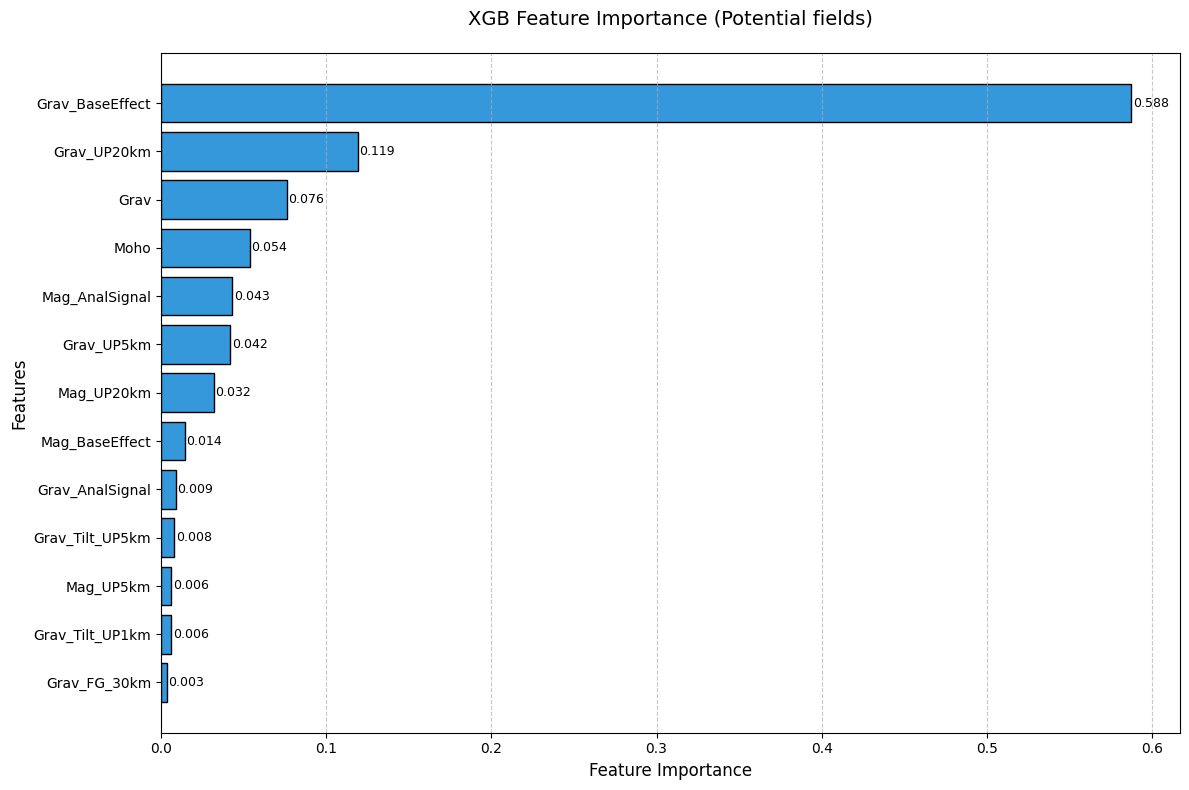

In [76]:
trained_model = model_5.fit(X_mg_scaled_new, y_mg)
feature_names = X_mg_scaled_new.columns
importances = trained_model.feature_importances_
sorted_idx = np.argsort(importances)
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(12, 8))
plt.barh(y=sorted_features[-25:], width=sorted_importances[-25:],color='#3498db',edgecolor='black')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("XGB Feature Importance (Potential fields)", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(sorted_importances[-25:]):
    plt.text(v + 0.001, i, f'{v:.3f}', color='black',va='center',fontsize=9)

plt.tight_layout()
plt.show()

XGB (Potential fields) - RMSE score: 19294.358317046128
XGB (Potential fields) - MSE score: 136.76147103927275
XGB (Potential fields) - MAE score: 60.2961144526808


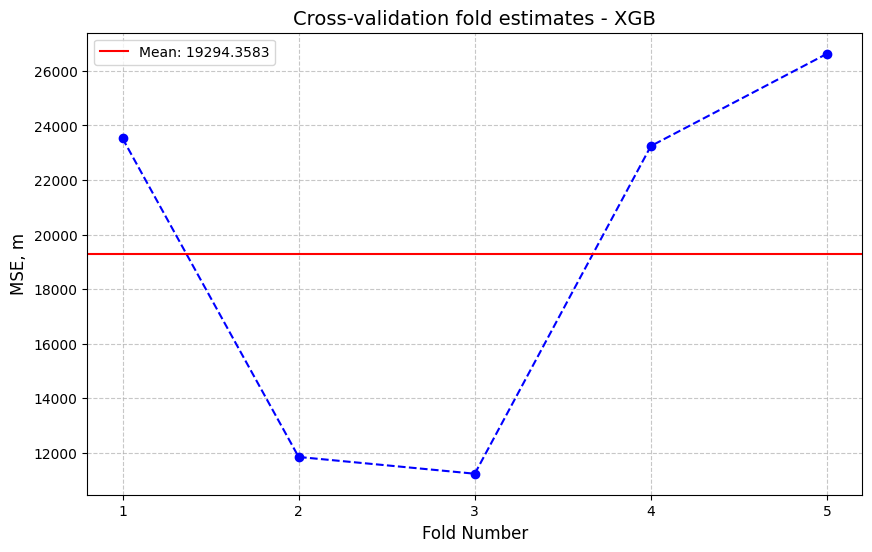

In [77]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 42)
scores_rmse = cross_val_score(model_5, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = True), cv=cv)
scores_mse = cross_val_score(model_5, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = False), cv=cv)
scores_mae = cross_val_score(model_5, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_absolute_error), cv=cv)

print(f"XGB (Potential fields) - RMSE score: {scores_rmse.mean()}")
print(f"XGB (Potential fields) - MSE score: {scores_mse.mean()}")
print(f"XGB (Potential fields) - MAE score: {scores_mae.mean()}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores_rmse, marker = 'o', linestyle = '--', color = 'b')
plt.axhline(y = scores_rmse.mean(), color = 'r', linestyle='-', label=f'Mean: {scores_rmse.mean():.4f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('MSE, m', fontsize=12)
plt.title('Cross-validation fold estimates - XGB', fontsize = 14)
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.7)
plt.show()

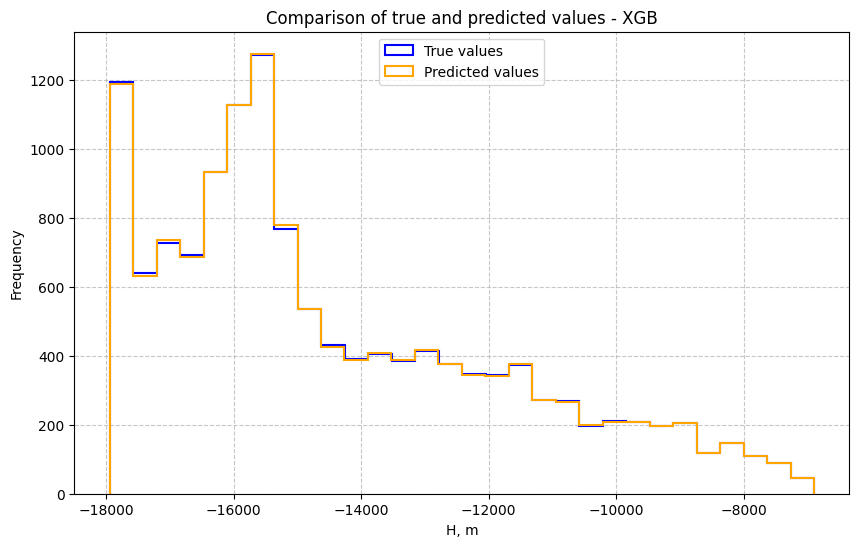

In [78]:
model_5.fit(X_mg_scaled_new, y_mg)
y_pred_xgb_mg = model_5.predict(X_mg_scaled_new)
plt.figure(figsize=(10, 6))
plt.hist(y_mg, 
         bins=30, 
         histtype='step',
         edgecolor='blue', 
         linewidth=1.5, 
         label='True values')

plt.hist(y_pred_xgb_mg, 
         bins=30, 
         histtype='step', 
         edgecolor='orange', 
         linewidth=1.5, 
         label='Predicted values')

plt.title('Comparison of true and predicted values - XGB')
plt.xlabel('H, m')
plt.ylabel('Frequency')
plt.legend(loc='upper center')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [79]:
#df_XGB = pd.DataFrame({'X': df_mg['X'],
#                   'Y': df_mg['Y'],
#                   'Z': y_pred_xgb_mg})
#df_XGB.to_csv('XGB.csv', index=False) 

In [80]:
from catboost import CatBoostRegressor
def objective(trial):
    cat_params = {
        "iterations" : trial.suggest_int("iterations", 2500, 6500, step=500),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel",  0.1, 0.5),
        "learning_rate": trial.suggest_float("learning_rate",1e-3, 1e-1, log=True),        
        "random_strength": trial.suggest_float("random_strength",1e-2, 1, log=True),
        "depth": trial.suggest_int("depth", 6, 16, step = 2),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 1, 8),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bernoulli"])
    }

    cat_regressor = CatBoostRegressor(**cat_params, verbose = 0)
    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    score = cross_val_score(cat_regressor, X_mg_scaled_new, y_mg, scoring=make_scorer(mean_squared_error, squared=True), cv=ss)
    return score.mean()

In [ ]:
""""
sampler = TPESampler(seed = 42)
study_6 = optuna.create_study(direction = "minimize", sampler = sampler)
study_6.optimize(objective, n_trials = 10)
"""

In [ ]:
#save_study(study_6, "/kaggle/working/study_CatBoost_Optuna_MG_MSE.pkl")

In [81]:
cat_params = {'iterations': 4000, 'colsample_bylevel': 0.4802857225639665, 'learning_rate': 0.029106359131330698, 'random_strength': 0.15751320499779725, 'depth': 6, 'l2_leaf_reg': 2, 'bootstrap_type': 'Bernoulli'}
model_6 = CatBoostRegressor(**cat_params, verbose = 0)

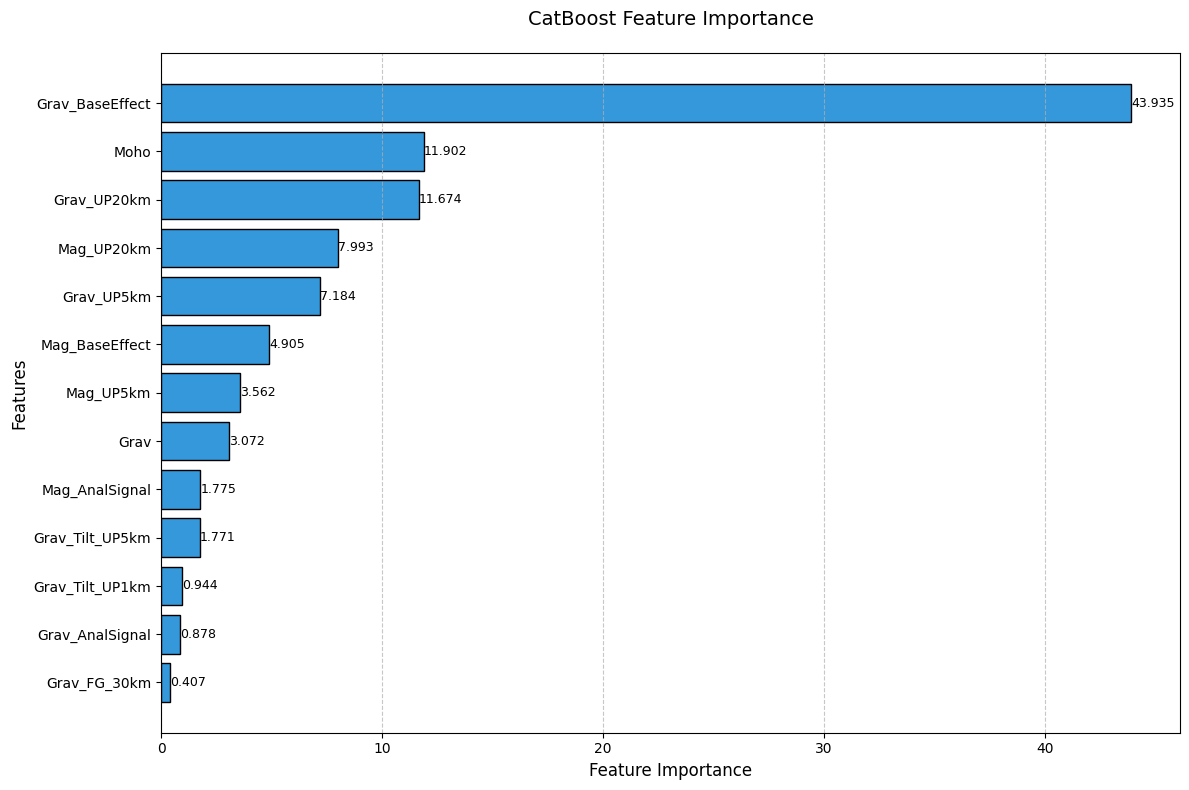

In [82]:
trained_model = model_6
trained_model.fit(X_mg_scaled_new, y_mg)
feature_names = X_mg_scaled_new.columns
importances = trained_model.feature_importances_

sorted_idx = np.argsort(importances)
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(12, 8))
plt.barh(y=sorted_features[-25:], width=sorted_importances[-25:],color='#3498db',edgecolor='black')

plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("CatBoost Feature Importance", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(sorted_importances[-25:]):
    plt.text(v + 0.001, i, f'{v:.3f}', color='black',va='center',fontsize=9)

plt.tight_layout()
plt.show()

CatBoost (Potential fields) - RMSE score: 149.57646505108593
CatBoost (Potential fields) - MSE score: 22849.21747561819
CatBoost (Potential fields) - MAE score: 77.93574029173232


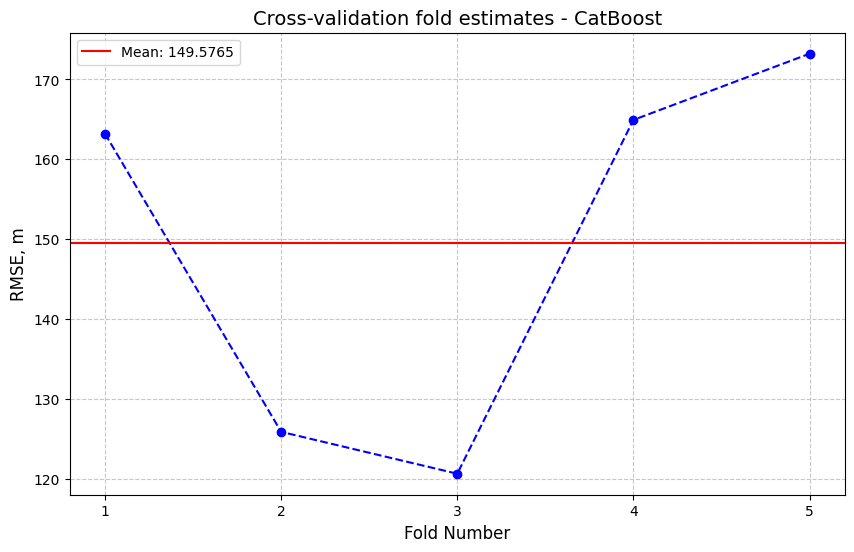

In [83]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 42)
scores_rmse = cross_val_score(model_6, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = False), cv=cv)
scores_mse = cross_val_score(model_6, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = True), cv=cv)
scores_mae = cross_val_score(model_6, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_absolute_error), cv=cv)

print(f"CatBoost (Potential fields) - RMSE score: {scores_rmse.mean()}")
print(f"CatBoost (Potential fields) - MSE score: {scores_mse.mean()}")
print(f"CatBoost (Potential fields) - MAE score: {scores_mae.mean()}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores_rmse, marker = 'o', linestyle = '--', color = 'b')
plt.axhline(y = scores_rmse.mean(), color = 'r', linestyle='-', label=f'Mean: {scores_rmse.mean():.4f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('RMSE, m', fontsize=12)
plt.title('Cross-validation fold estimates - CatBoost', fontsize = 14)
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.7)
plt.show()

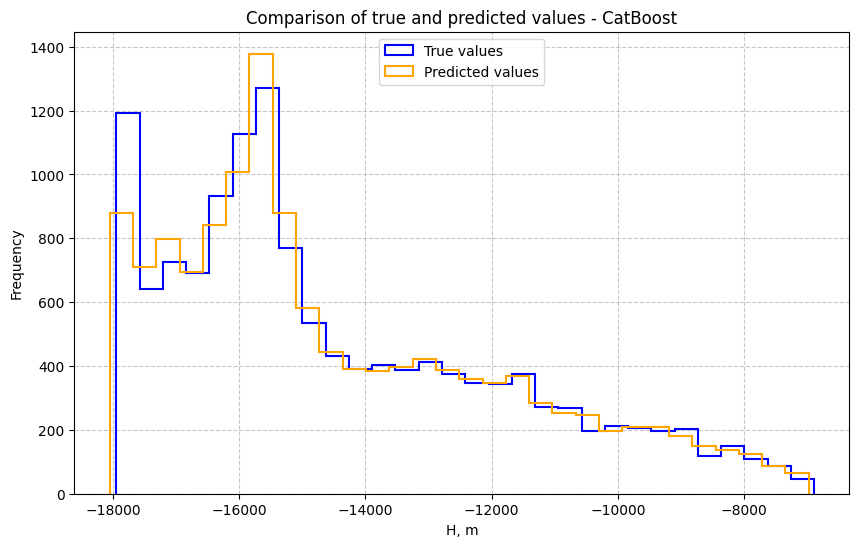

In [84]:
model_6.fit(X_mg_scaled_new, y_mg)
y_pred_CatBoost_mg = model_6.predict(X_mg_scaled_new)
plt.figure(figsize=(10, 6))
plt.hist(y_mg, 
         bins=30, 
         histtype='step',
         edgecolor='blue', 
         linewidth=1.5, 
         label='True values')

plt.hist(y_pred_CatBoost_mg, 
         bins=30, 
         histtype='step', 
         edgecolor='orange', 
         linewidth=1.5, 
         label='Predicted values')

plt.title('Comparison of true and predicted values - CatBoost')
plt.xlabel('H, m')
plt.ylabel('Frequency')
plt.legend(loc='upper center')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [85]:
#df_cat = pd.DataFrame({'X': df_mg['X'],
#                   'Y': df_mg['Y'],
#                   'Z': y_pred_CatBoost_mg})
#df_cat.to_csv('Cat.csv', index=False) 

In [86]:
def objective(trial):
    lgbm_params = {'n_estimators': trial.suggest_int("n_estimators", 3000, 7000, step = 100),
        'num_leaves': trial.suggest_int("num_leaves", 15, 255, step = 10),
        'max_depth': trial.suggest_int("max_depth", 3, 12, step = 2),
        'learning_rate': trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        'reg_alpha': trial.suggest_float("reg_alpha", 1e-6, 1e-1, log=True),
        'reg_lambda': trial.suggest_float("reg_lambda", 1e-6, 1e-1, log=True),
        'subsample': trial.suggest_float("subsample", 0.6, 0.95),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.6, 0.95),
        'min_child_weight': trial.suggest_float("min_child_weight", 1e-6, 1e-1, log=True),
        'bagging_freq': trial.suggest_int("bagging_freq", 1, 5),
        'objective': 'regression',
        'metric': 'rmse',
        'random_state': 42,
        'device': 'cpu',
        'verbose': -1}

    lgbm_regressor = LGBMRegressor(**lgbm_params)
    ss = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)
    score = cross_val_score(lgbm_regressor, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error), cv = ss)
    score = score.mean()
    return score

In [87]:
'''
sampler = TPESampler(seed = 42)
study_7 = optuna.create_study(direction = "minimize", sampler = sampler)
study_7.optimize(objective, n_trials = 10)
'''

'\nsampler = TPESampler(seed = 42)\nstudy_7 = optuna.create_study(direction = "minimize", sampler = sampler)\nstudy_7.optimize(objective, n_trials = 10)\n'

In [88]:
#save_study(study_7, "/kaggle/working/study_LGBM_Optuna_MG_MSE.pkl")

In [89]:
study_7 = load_study("/kaggle/input/study-7-lgbm-mg-anabar/study_LGBM_Optuna_MG_MSE.pkl")

In [90]:
fig = plot_optimization_history(study_7)
fig.show(renderer='iframe')

In [91]:
model_7 = LGBMRegressor(**study_7.best_params, objective = 'regression',
                                               metric = 'rmse',
                                               random_state = 42,
                                               device = 'cpu',
                                               verbose = -1)

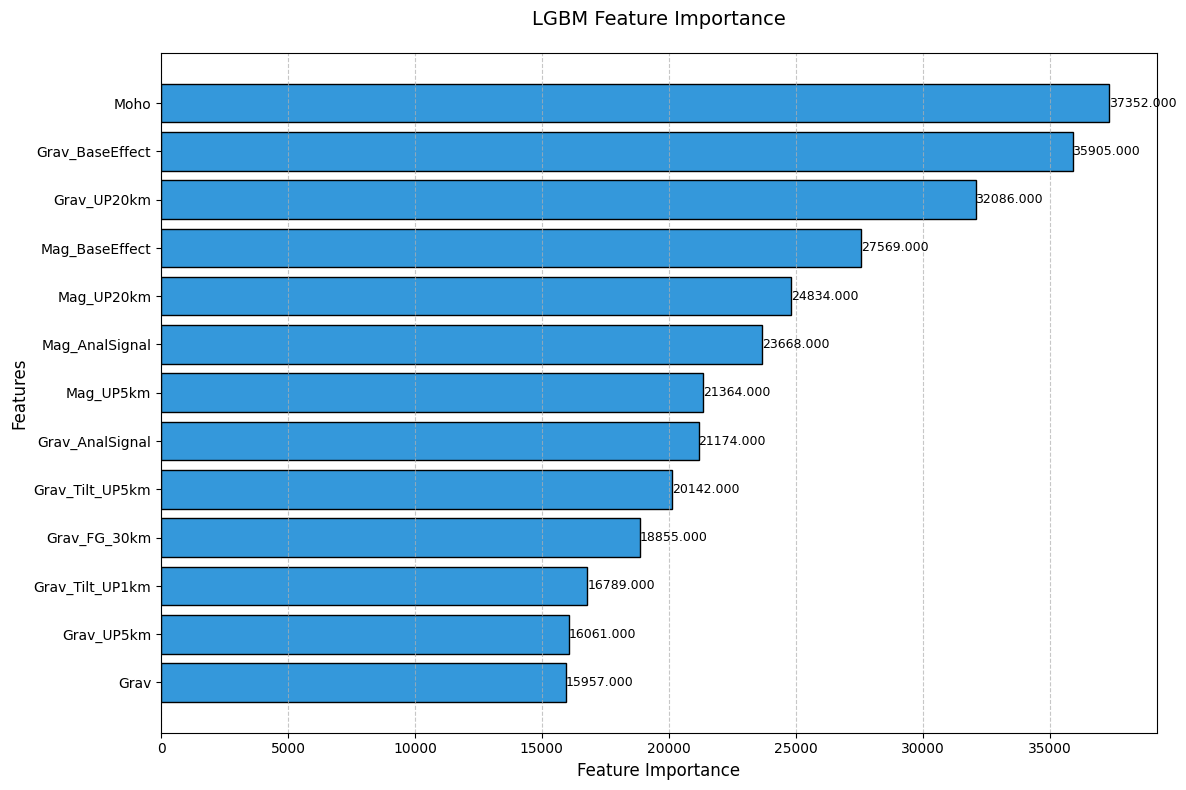

In [92]:
model_7.fit(X_mg_scaled_new, y_mg)
trained_model = model_7
feature_names = X_mg_scaled_new.columns
importances = trained_model.feature_importances_

sorted_idx = np.argsort(importances)
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(12, 8))
plt.barh(y=sorted_features[-25:], width=sorted_importances[-25:],color='#3498db',edgecolor='black')

plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("LGBM Feature Importance", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(sorted_importances[-25:]):
    plt.text(v + 0.001, i, f'{v:.3f}', color='black',va='center',fontsize=9)

plt.tight_layout()
plt.show()

GBM (Potential fields) - RMSE score: 141.34749835971223
GBM (Potential fields) - MSE score: 20486.98499536502
GBM (Potential fields) - MAE score: 65.25908699338119


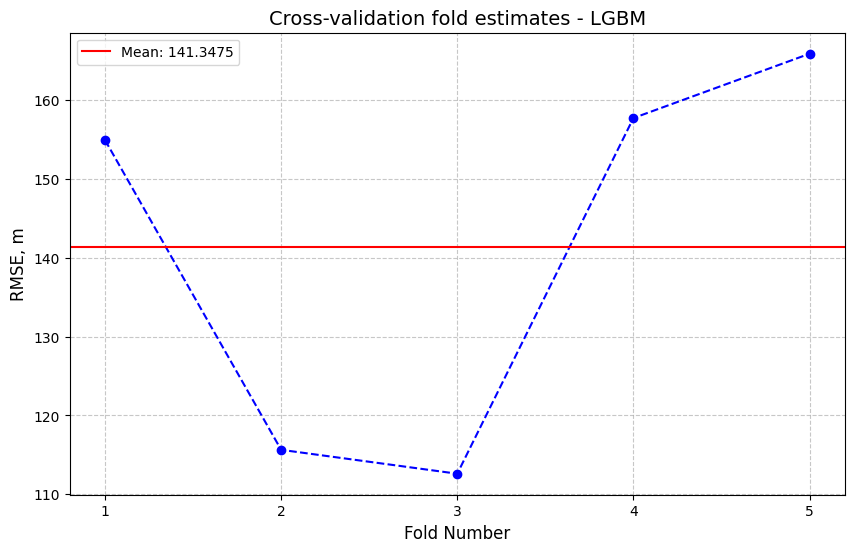

In [93]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 42)
scores_rmse = cross_val_score(model_7, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = False), cv=cv)
scores_mse = cross_val_score(model_7, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = True), cv=cv)
scores_mae = cross_val_score(model_7, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_absolute_error), cv=cv)

print(f"GBM (Potential fields) - RMSE score: {scores_rmse.mean()}")
print(f"GBM (Potential fields) - MSE score: {scores_mse.mean()}")
print(f"GBM (Potential fields) - MAE score: {scores_mae.mean()}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores_rmse, marker = 'o', linestyle = '--', color = 'b')
plt.axhline(y = scores_rmse.mean(), color = 'r', linestyle='-', label=f'Mean: {scores_rmse.mean():.4f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('RMSE, m', fontsize=12)
plt.title('Cross-validation fold estimates - LGBM', fontsize = 14)
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.7)
plt.show()

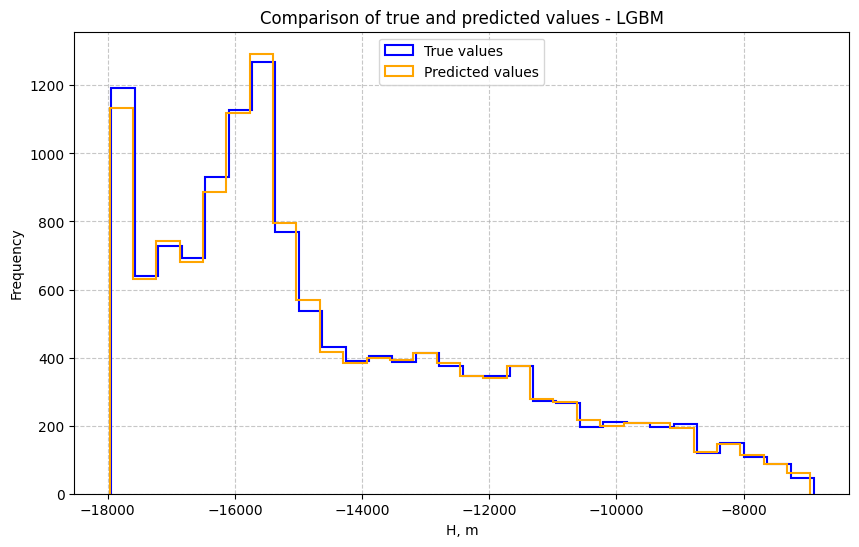

In [94]:
model_7.fit(X_mg_scaled_new, y_mg)
y_pred_lgbm_mg = model_7.predict(X_mg_scaled_new)
plt.figure(figsize=(10, 6))
plt.hist(y_mg, 
         bins=30, 
         histtype='step',
         edgecolor='blue', 
         linewidth=1.5, 
         label='True values')

plt.hist(y_pred_lgbm_mg, 
         bins=30, 
         histtype='step', 
         edgecolor='orange', 
         linewidth=1.5, 
         label='Predicted values')

plt.title('Comparison of true and predicted values - LGBM')
plt.xlabel('H, m')
plt.ylabel('Frequency')
plt.legend(loc='upper center')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [95]:
#df_lgbm = pd.DataFrame({'X': df_mg['X'],
#                   'Y': df_mg['Y'],
#                   'Z': y_pred_lgbm_mg})
#df_lgbm.to_csv('Lgbm.csv', index=False) 

In [96]:
def objective(trial):
    hgb_params = {
        'max_iter': trial.suggest_int("max_iter", 3000, 7000, step = 200),
        'max_depth': trial.suggest_int("max_depth", 3, 12, step = 2),
        'learning_rate': trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        'l2_regularization': trial.suggest_float("l2_regularization", 0.1, 10.0),
        'random_state': 42,
        'verbose': 0}
    hgb_regressor = HistGradientBoostingRegressor(**hgb_params)
    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    score = cross_val_score(hgb_regressor, X_mg_scaled_new, y_mg, scoring=make_scorer(mean_squared_error, squared = True), cv = ss)
    return score.mean()

In [ ]:
"""
sampler = TPESampler(seed = 42)
study_8 = optuna.create_study(direction = "minimize", sampler = sampler)
study_8.optimize(objective, n_trials = 10)
"""

In [ ]:
#save_study(study_8, "/kaggle/working/study_HistGBM_Optuna_MG_MSE.pkl")

In [97]:
study_8 = load_study("/kaggle/input/study-8-histgbm-mg-anabar/study_HistGBM_Optuna_MG_MSE.pkl")

In [98]:
fig = plot_optimization_history(study_8)
fig.show(renderer='iframe')

In [99]:
model_8 = HistGradientBoostingRegressor(**study_8.best_params, random_state = 42, verbose = 0)

GBM (Potential fields) - RMSE score: 147.40897343064285
GBM (Potential fields) - MSE score: 22176.947386313725
GBM (Potential fields) - MAE score: 72.52670467967906


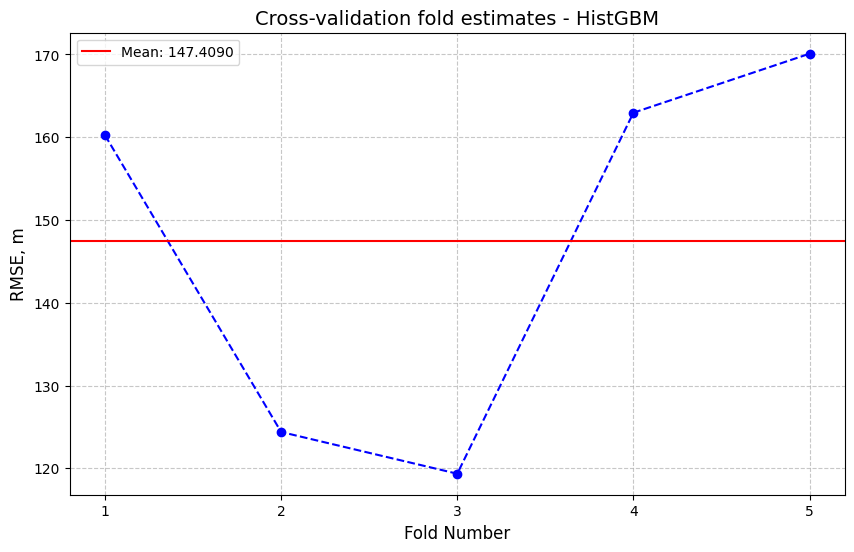

In [100]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 42)
scores_rmse = cross_val_score(model_8, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = False), cv=cv)
scores_mse = cross_val_score(model_8, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = True), cv=cv)
scores_mae = cross_val_score(model_8, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_absolute_error), cv=cv)

print(f"GBM (Potential fields) - RMSE score: {scores_rmse.mean()}")
print(f"GBM (Potential fields) - MSE score: {scores_mse.mean()}")
print(f"GBM (Potential fields) - MAE score: {scores_mae.mean()}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores_rmse, marker = 'o', linestyle = '--', color = 'b')
plt.axhline(y = scores_rmse.mean(), color = 'r', linestyle='-', label=f'Mean: {scores_rmse.mean():.4f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('RMSE, m', fontsize=12)
plt.title('Cross-validation fold estimates - HistGBM', fontsize = 14)
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.7)
plt.show()

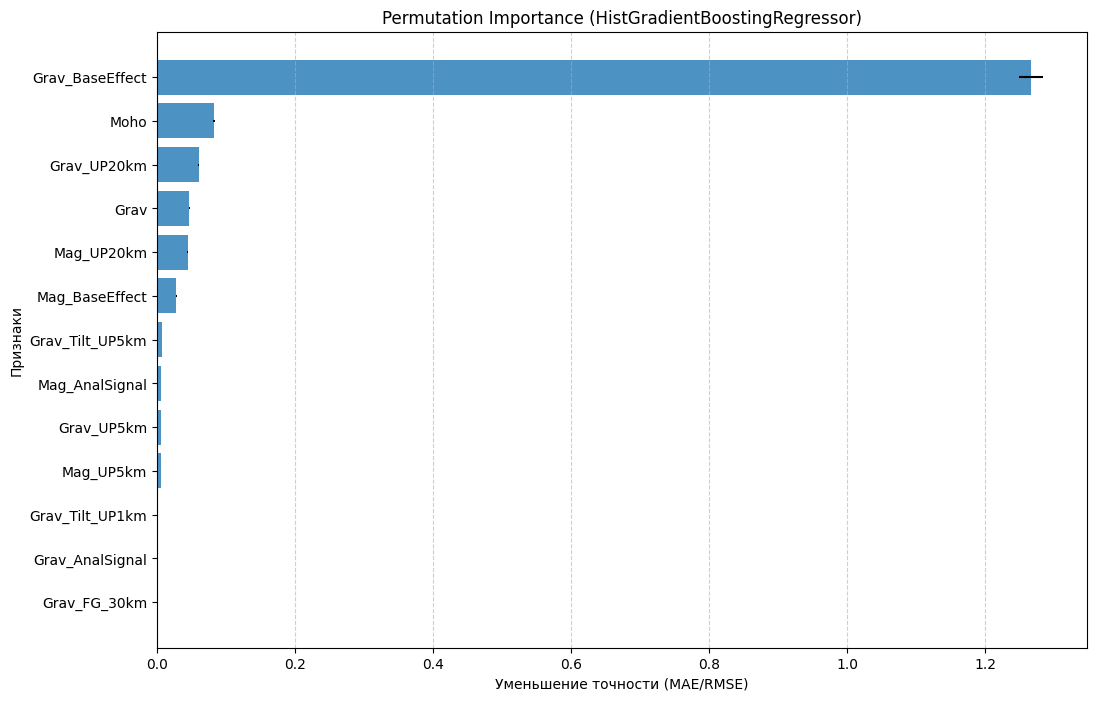

In [101]:
model_8.fit(X_mg_scaled_new, y_mg)

result = permutation_importance(model_8, X_mg_scaled_new, y_mg, n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()
features = X_mg_scaled_new.columns[sorted_idx]
importances = result.importances_mean[sorted_idx]
std = result.importances_std[sorted_idx]

# Построение графика
plt.figure(figsize=(12, 8))
plt.barh(features, importances, xerr=std, align='center', alpha=0.8)
plt.title("Permutation Importance (HistGradientBoostingRegressor)")
plt.xlabel("Уменьшение точности (MAE/RMSE)")
plt.ylabel("Признаки")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

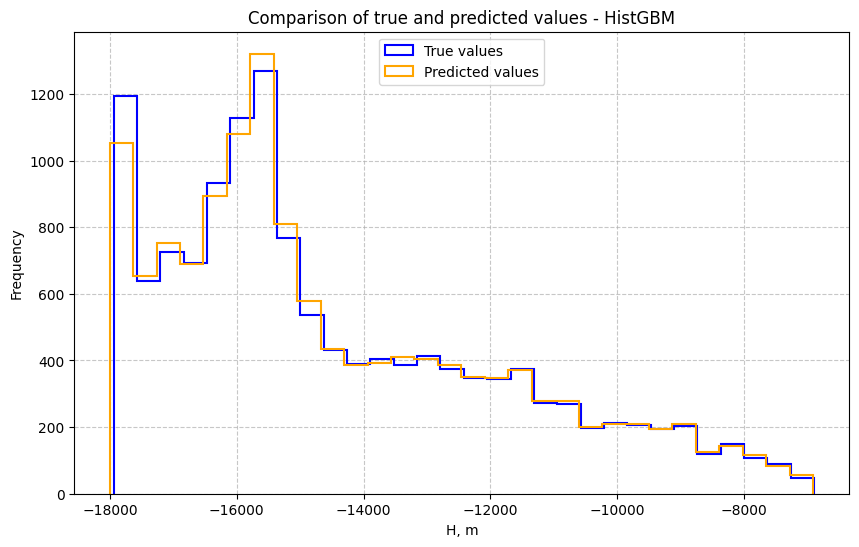

In [102]:
model_8.fit(X_mg_scaled_new, y_mg)
y_pred_HistGBM_mg = model_8.predict(X_mg_scaled_new)
plt.figure(figsize=(10, 6))
plt.hist(y_mg, 
         bins=30, 
         histtype='step',
         edgecolor='blue', 
         linewidth=1.5, 
         label='True values')

plt.hist(y_pred_HistGBM_mg, 
         bins=30, 
         histtype='step', 
         edgecolor='orange', 
         linewidth=1.5, 
         label='Predicted values')

plt.title('Comparison of true and predicted values - HistGBM')
plt.xlabel('H, m')
plt.ylabel('Frequency')
plt.legend(loc='upper center')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [103]:
df_Histgbm = pd.DataFrame({'X': df_mg['X'],
                   'Y': df_mg['Y'],
                   'Z': y_pred_HistGBM_mg})
df_Histgbm.to_csv('Histgbm.csv', index=False) 

In [104]:
def objective(trial):
    EN_params = {'max_iter': trial.suggest_int("max_iter", 1000, 4000),
                 'alpha': trial.suggest_float("alpha", 1e-4, 100, log=True),
                 'l1_ratio': trial.suggest_float("l1_ratio", 0.0, 1.0, step = 0.05),
                 'tol': trial.suggest_float("tol", 1e-6, 1e-3, log=True)}
    
    EN_regressor = ElasticNet(**EN_params)
    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    score = cross_val_score(EN_regressor, X_mg_scaled_new, y_mg, scoring=make_scorer(mean_squared_error, squared = False), cv = ss)
    return score.mean()

In [105]:
sampler = TPESampler(seed = 42)
study_9 = optuna.create_study(direction = "minimize", sampler = sampler)
study_9.optimize(objective, n_trials = 25)

[I 2025-03-25 14:54:53,032] A new study created in memory with name: no-name-65bd396e-2118-40e3-be80-cc437f46c53f
[I 2025-03-25 14:54:53,084] Trial 0 finished with value: 2490.1716763665804 and parameters: {'max_iter': 2123, 'alpha': 50.61576888752309, 'l1_ratio': 0.75, 'tol': 6.251373574521755e-05}. Best is trial 0 with value: 2490.1716763665804.
[I 2025-03-25 14:54:54,395] Trial 1 finished with value: 858.9347940281966 and parameters: {'max_iter': 1468, 'alpha': 0.0008629132190071859, 'l1_ratio': 0.05, 'tol': 0.0003967605077052988}. Best is trial 1 with value: 858.9347940281966.
[I 2025-03-25 14:54:56,913] Trial 2 finished with value: 1908.8314849499177 and parameters: {'max_iter': 2803, 'alpha': 1.7718847354806828, 'l1_ratio': 0.0, 'tol': 0.0008123245085588687}. Best is trial 1 with value: 858.9347940281966.
[I 2025-03-25 14:54:58,428] Trial 3 finished with value: 863.087991785003 and parameters: {'max_iter': 3498, 'alpha': 0.0018794668241638478, 'l1_ratio': 0.15000000000000002, 'to

In [106]:
model_9 = ElasticNet(**study_9.best_params)

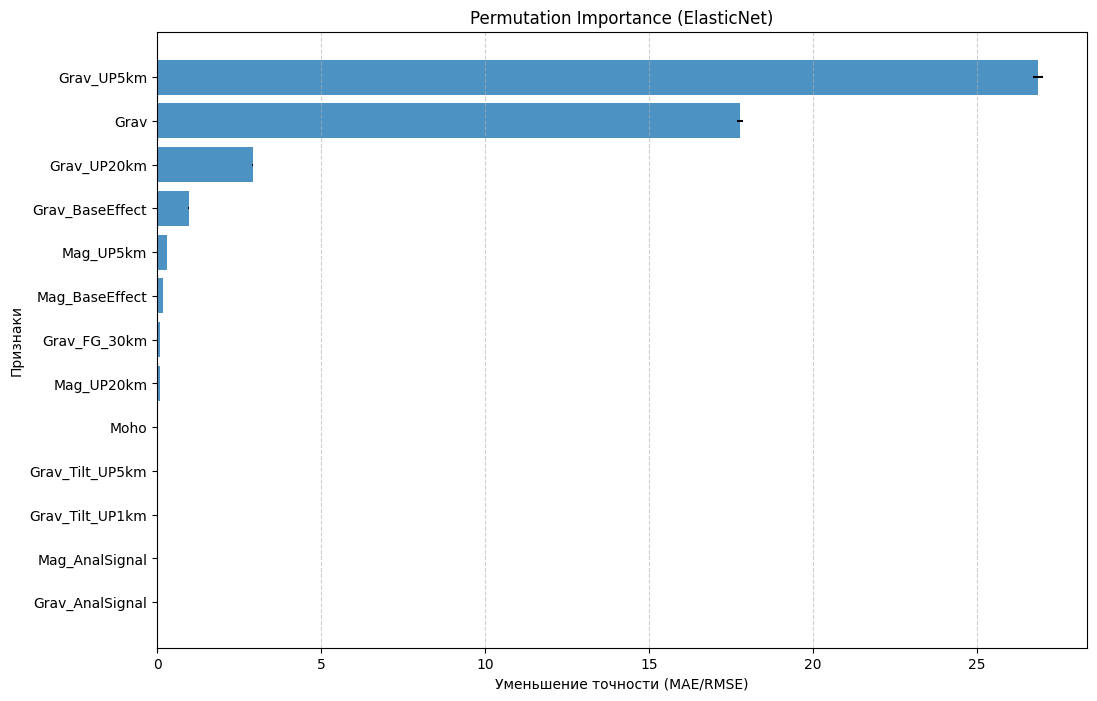

In [107]:
model_9.fit(X_mg_scaled_new, y_mg)

result = permutation_importance(model_9, X_mg_scaled_new, y_mg, n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()
features = X_mg_scaled_new.columns[sorted_idx]
importances = result.importances_mean[sorted_idx]
std = result.importances_std[sorted_idx]

# Построение графика
plt.figure(figsize=(12, 8))
plt.barh(features, importances, xerr=std, align='center', alpha=0.8)
plt.title("Permutation Importance (ElasticNet)")
plt.xlabel("Уменьшение точности (MAE/RMSE)")
plt.ylabel("Признаки")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

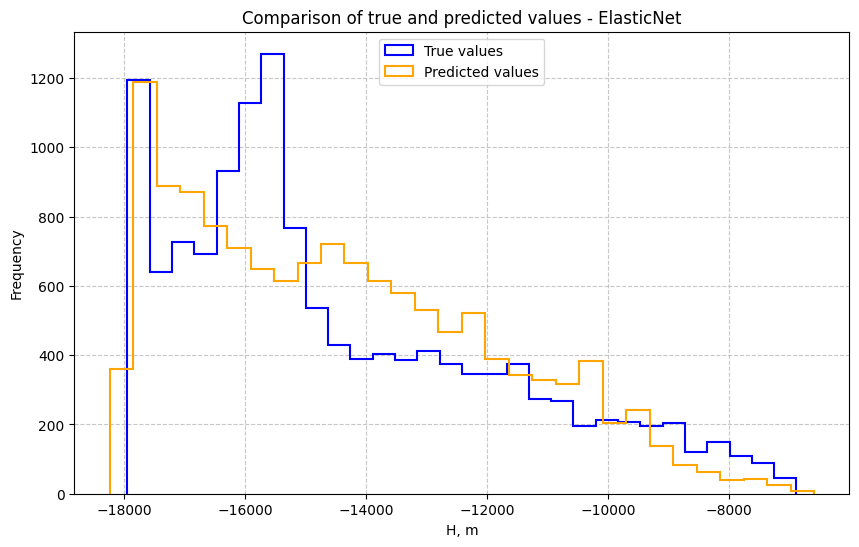

In [108]:
model_9.fit(X_mg_scaled_new, y_mg)
y_pred_EN_mg = model_9.predict(X_mg_scaled_new)
plt.figure(figsize=(10, 6))
plt.hist(y_mg, 
         bins=30, 
         histtype='step',
         edgecolor='blue', 
         linewidth=1.5, 
         label='True values')

plt.hist(y_pred_EN_mg, 
         bins=30, 
         histtype='step', 
         edgecolor='orange', 
         linewidth=1.5, 
         label='Predicted values')

plt.title('Comparison of true and predicted values - ElasticNet')
plt.xlabel('H, m')
plt.ylabel('Frequency')
plt.legend(loc='upper center')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

ElasticNet (Potential fields) - RMSE score: 833.3623176177941
ElasticNet (Potential fields) - MSE score: 694606.8974250127
ElasticNet (Potential fields) - MAE score: 624.9504666017681


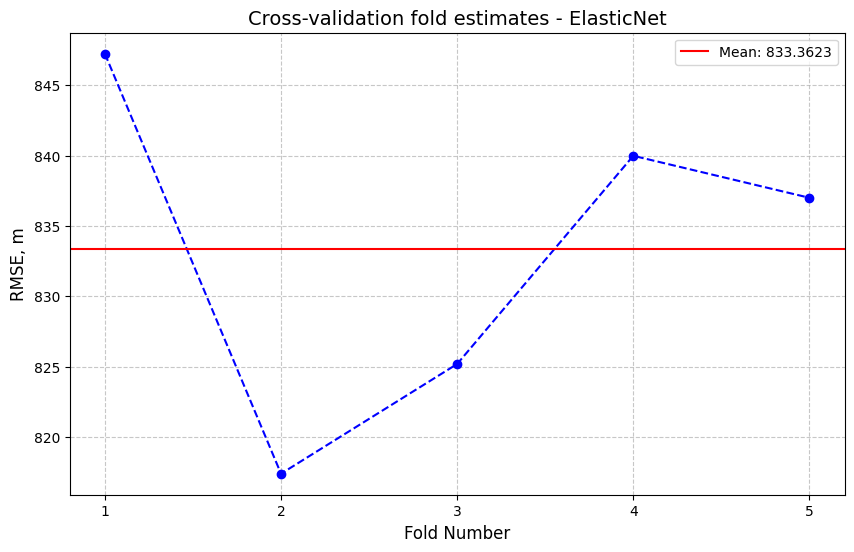

In [109]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 42)
scores_rmse = cross_val_score(model_9, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = False), cv=cv)
scores_mse = cross_val_score(model_9, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = True), cv=cv)
scores_mae = cross_val_score(model_9, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_absolute_error), cv=cv)

print(f"ElasticNet (Potential fields) - RMSE score: {scores_rmse.mean()}")
print(f"ElasticNet (Potential fields) - MSE score: {scores_mse.mean()}")
print(f"ElasticNet (Potential fields) - MAE score: {scores_mae.mean()}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores_rmse, marker = 'o', linestyle = '--', color = 'b')
plt.axhline(y = scores_rmse.mean(), color = 'r', linestyle='-', label=f'Mean: {scores_rmse.mean():.4f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('RMSE, m', fontsize=12)
plt.title('Cross-validation fold estimates - ElasticNet', fontsize = 14)
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.7)
plt.show()

In [110]:
#df_ElasticNet = pd.DataFrame({'X': df_mg['X'],
#                   'Y': df_mg['Y'],
#                   'Z': y_pred_EN_mg})
#df_ElasticNet.to_csv('ElasticNet.csv', index=False) 

In [111]:
estimators_mg = [('XGB_PF', model_5),
                 ('LGBM_PF', model_6),
                 ('CatBoost_PF', model_7),
                 ('HGBM_PF', model_8)]
stacking_regressor_mg = StackingRegressor(estimators = estimators_mg, final_estimator = Lasso())
stacking_regressor_mg.fit(X_mg_scaled_new, y_mg)
y_pred_stacking_mg = stacking_regressor_mg.predict(X_mg_scaled_new)

score_mse = mean_squared_error(y_mg, y_pred_stacking_mg)
score_rmse = np.sqrt(mean_squared_error(y_mg, y_pred_stacking_mg))
score_mae = mean_absolute_error(y_mg, y_pred_stacking_mg)

In [112]:
print(f"PF Score (MSE) on Train Data is - {score_mse}")
print(f"PF Score (RMSE) on Train Data is - {score_rmse}")
print(f"PF Score (MAE) on Train Data is - {score_mae}")

PF Score (MSE) on Train Data is - 174564.88977204091
PF Score (RMSE) on Train Data is - 417.80963341220473
PF Score (MAE) on Train Data is - 317.30237881223354


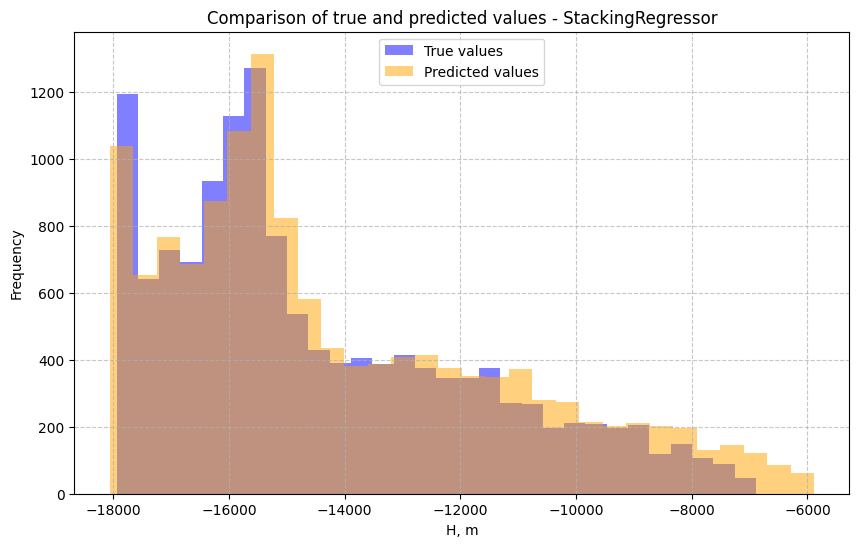

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(y_mg, bins=30, alpha=0.5, label='True values', color='blue')
plt.hist(y_pred_stacking_mg, bins=30, alpha=0.5, label='Predicted values', color='orange')
plt.title('Comparison of true and predicted values - StackingRegressor')
plt.xlabel('H, m')
plt.ylabel('Frequency')
plt.legend(loc='upper center')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#df_Stacking = pd.DataFrame({'X': df_mg['X'],
#                   'Y': df_mg['Y'],
#                   'Z': y_pred_stacking_mg})
#df_Stacking.to_csv('Stacking.csv', index=False) 

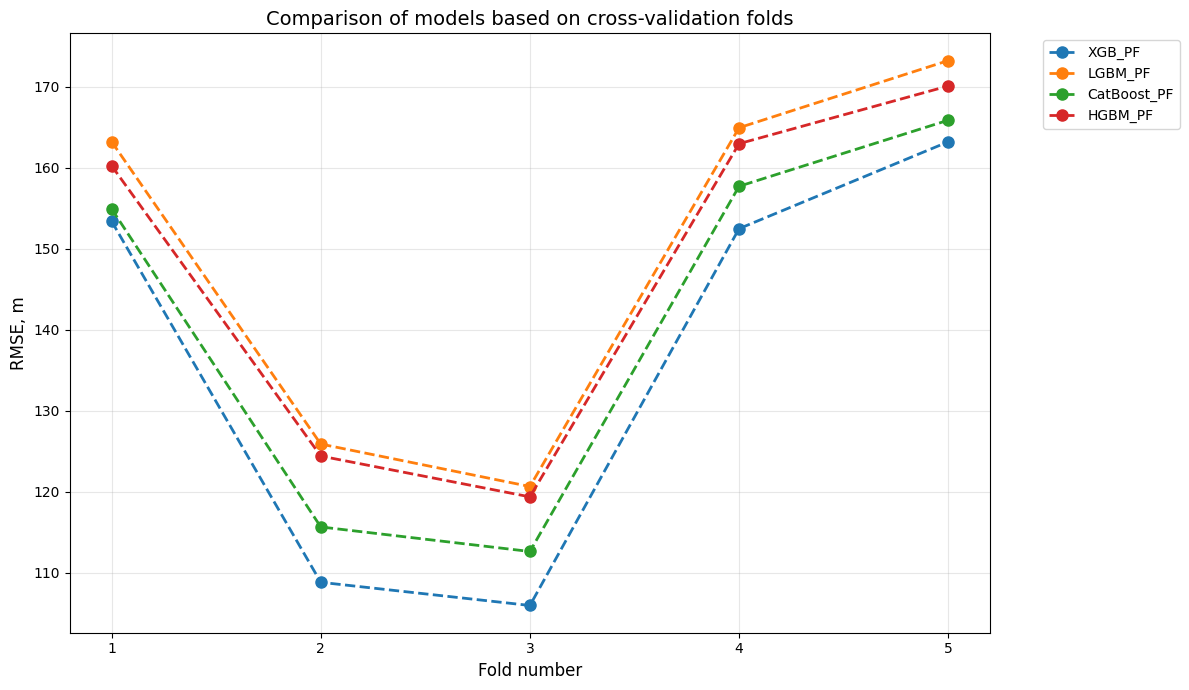

In [114]:
plt.figure(figsize=(12, 7))
cv = ShuffleSplit(n_splits=5,  test_size=0.3, random_state=42)
colors = plt.cm.tab10(range(len(estimators_mg)))
for (name, model), color in zip(estimators_mg, colors):
    scores = cross_val_score(model, X_mg_scaled_new, y_mg, scoring = make_scorer(mean_squared_error, squared = False), cv = cv, n_jobs=-1)
    plt.plot(range(1, 6), scores, marker = 'o', linestyle = '--', color = color, label = name, markersize = 8, linewidth = 2)

plt.title('Comparison of models based on cross-validation folds', fontsize=14)
plt.xlabel('Fold number', fontsize=12)
plt.ylabel('RMSE, m', fontsize=12)
plt.xticks(range(1, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [115]:
path_test = '/kaggle/input/test-data-anabar/Test.csv'
df_test = pd.read_csv(path_test, delimiter = ';')
df_test.head()

X            Y          Mag        Mag_Vz   Mag_UP20km    Mag_UP5km  \
0  272000  7736994,681  242,6396169  -0,008992685  254,0440675   259,310761   
1  274000  7736994,681   244,779528  -0,006069542  252,2628937   257,548615   
2  276000  7736994,681    257,11371   0,008797483  250,3445435  255,6004948   
3  278000  7736994,681  244,3286294  -0,005548083  248,2753296  253,4233403   
4  280000  7736994,681  243,1355598   0,002541315   246,039795  251,5758212   

  Mag_Tilt_UP5km Mag_Tilt_UP1km      Mag_Tilt   Mag_FG_30km  ...  \
0   -0,321489746   -0,636732034  -0,995405976  -0,007646289  ...   
1   -0,298620694   -0,445383743  -0,822236779   0,000657113  ...   
2   -0,298103742   -0,263596558  -0,116712395  -6,60573E-05  ...   
3   -0,321777694    -0,65248219  -1,124972189  -0,002746666  ...   
4   -0,340024196   -0,513675561  -0,556604329  -0,004457862  ...   

  Grav_Tilt_UP5km Grav_Tilt_UP1km     Grav_Tilt  Grav_FG_30km  Grav_FG_10km  \
0    -1,209335445    -1,355145215  -1,416184304   0,000164592   8,18242E-05   
1    -1,218920468    -1,353346108  -1,383533476  -0,000171114  -8,98439E-05   
2    -1,220535992    -1,349022507  -1,371571422  -0,000118168  -1,35336E-05   
3    -1,212449549     -1,32669568  -1,335740687  -4,79392E-05  -2,68313E-05   
4    -1,195161937    -1,276480077  -1,284803031   5,85127E-05   2,20448E-05   

  Grav_AnalSignal Grav_BaseEffect          Moho       Relief Visible  
0        0,002722    -33,83878911  -46,14486153  439,4329073     NaN  
1     0,002166118    -34,49385375   -46,0888548  458,3182473     NaN  
2     0,002044543    -34,90464475   -46,0331961  479,6329229     NaN  
3     0,001911693    -35,12486726  -45,96596573  517,2150665     NaN  
4     0,001861272    -35,19881269  -45,89273016  512,0351205     NaN  

[5 rows x 27 columns]

In [116]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27841 entries, 0 to 27840
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   X                27841 non-null  int64 
 1   Y                27841 non-null  object
 2   Mag              27741 non-null  object
 3   Mag_Vz           27741 non-null  object
 4   Mag_UP20km       27741 non-null  object
 5   Mag_UP5km        27741 non-null  object
 6   Mag_Tilt_UP5km   27741 non-null  object
 7   Mag_Tilt_UP1km   27741 non-null  object
 8   Mag_Tilt         27741 non-null  object
 9   Mag_FG_30km      27741 non-null  object
 10  Mag_FG_10km      27741 non-null  object
 11  Mag_AnalSignal   27741 non-null  object
 12  Mag_BaseEffect   27841 non-null  object
 13  Grav             27741 non-null  object
 14  Grav_Vz          27741 non-null  object
 15  Grav_UP20km      27741 non-null  object
 16  Grav_UP5km       27741 non-null  object
 17  Grav_Tilt_UP5km  27741 non-null

In [117]:
cols_to_convert = df_test.columns.difference(['X'])

for col in cols_to_convert:
    df_test[col] = df_test[col].str.replace(',', '.').astype('float64')

df_test['X'] = df_test['X'].astype('float64')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27841 entries, 0 to 27840
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                27841 non-null  float64
 1   Y                27841 non-null  float64
 2   Mag              27741 non-null  float64
 3   Mag_Vz           27741 non-null  float64
 4   Mag_UP20km       27741 non-null  float64
 5   Mag_UP5km        27741 non-null  float64
 6   Mag_Tilt_UP5km   27741 non-null  float64
 7   Mag_Tilt_UP1km   27741 non-null  float64
 8   Mag_Tilt         27741 non-null  float64
 9   Mag_FG_30km      27741 non-null  float64
 10  Mag_FG_10km      27741 non-null  float64
 11  Mag_AnalSignal   27741 non-null  float64
 12  Mag_BaseEffect   27841 non-null  float64
 13  Grav             27741 non-null  float64
 14  Grav_Vz          27741 non-null  float64
 15  Grav_UP20km      27741 non-null  float64
 16  Grav_UP5km       27741 non-null  float64
 17  Grav_Tilt_UP

In [118]:
X_test = df_test['X']
Y_test = df_test['Y']
df_test = df_test.drop(columns = ['X', 'Y', 'Visible'])
df_test = scaler.transform(df_test)
column_scaler_mg = (['Mag','Mag_UP20km','Mag_UP5km','Mag_FG_30km','Mag_FG_10km','Mag_BaseEffect','Grav','Grav_UP20km','Grav_UP5km','Grav_BaseEffect','Moho','Relief'] + 
                    ['Mag_Vz','Mag_Tilt_UP5km','Mag_Tilt_UP1km','Mag_Tilt','Mag_AnalSignal','Grav_Vz','Grav_Tilt_UP5km','Grav_Tilt_UP1km','Grav_Tilt','Grav_FG_30km','Grav_FG_10km','Grav_AnalSignal'] + 
                    [col for col in X_mg.columns if col not in 
                    ['Mag','Mag_UP20km','Mag_UP5km','Mag_FG_30km','Mag_FG_10km','Mag_BaseEffect','Grav','Grav_UP20km','Grav_UP5km','Grav_BaseEffect','Moho','Relief',
                     'Mag_Vz','Mag_Tilt_UP5km','Mag_Tilt_UP1km','Mag_Tilt','Mag_AnalSignal','Grav_Vz','Grav_Tilt_UP5km','Grav_Tilt_UP1km','Grav_Tilt','Grav_FG_30km','Grav_FG_10km','Grav_AnalSignal']])
df_test = pd.DataFrame(df_test, columns = column_scaler_mg)

In [119]:
df_test_X = df_test.drop(columns = ['Mag_Tilt', 'Mag_Vz', 'Mag', 'Mag_FG_10km', 'Mag_Tilt_UP1km', 'Grav_Tilt', 
                                    'Grav_FG_10km', 'Mag', 'Relief', 'Mag_FG_30km', 'Grav_Vz', 'Mag_Tilt_UP5km'])
df_test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27841 entries, 0 to 27840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mag_UP20km       27741 non-null  float64
 1   Mag_UP5km        27741 non-null  float64
 2   Mag_BaseEffect   27841 non-null  float64
 3   Grav             27741 non-null  float64
 4   Grav_UP20km      27741 non-null  float64
 5   Grav_UP5km       27741 non-null  float64
 6   Grav_BaseEffect  27841 non-null  float64
 7   Moho             27468 non-null  float64
 8   Mag_AnalSignal   27741 non-null  float64
 9   Grav_Tilt_UP5km  27741 non-null  float64
 10  Grav_Tilt_UP1km  27741 non-null  float64
 11  Grav_FG_30km     27741 non-null  float64
 12  Grav_AnalSignal  27741 non-null  float64
dtypes: float64(13)
memory usage: 2.8 MB


In [120]:
X_mg_scaled_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13411 entries, 0 to 13410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mag_UP20km       13411 non-null  float64
 1   Mag_UP5km        13411 non-null  float64
 2   Mag_BaseEffect   13411 non-null  float64
 3   Grav             13411 non-null  float64
 4   Grav_UP20km      13411 non-null  float64
 5   Grav_UP5km       13411 non-null  float64
 6   Grav_BaseEffect  13411 non-null  float64
 7   Moho             13411 non-null  float64
 8   Mag_AnalSignal   13411 non-null  float64
 9   Grav_Tilt_UP5km  13411 non-null  float64
 10  Grav_Tilt_UP1km  13411 non-null  float64
 11  Grav_FG_30km     13411 non-null  float64
 12  Grav_AnalSignal  13411 non-null  float64
dtypes: float64(13)
memory usage: 1.3 MB


In [121]:
mode_dict = {}
for column in df_test_X.columns:
    rounded_series = df_test_X[column].round(3)
    mode = rounded_series.mode()[0] if not rounded_series.mode().empty else np.nan
    mode_dict[column] = mode

# Замена пропусков
df_test_X = df_test_X.fillna(mode_dict)

In [122]:
df_test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27841 entries, 0 to 27840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mag_UP20km       27841 non-null  float64
 1   Mag_UP5km        27841 non-null  float64
 2   Mag_BaseEffect   27841 non-null  float64
 3   Grav             27841 non-null  float64
 4   Grav_UP20km      27841 non-null  float64
 5   Grav_UP5km       27841 non-null  float64
 6   Grav_BaseEffect  27841 non-null  float64
 7   Moho             27841 non-null  float64
 8   Mag_AnalSignal   27841 non-null  float64
 9   Grav_Tilt_UP5km  27841 non-null  float64
 10  Grav_Tilt_UP1km  27841 non-null  float64
 11  Grav_FG_30km     27841 non-null  float64
 12  Grav_AnalSignal  27841 non-null  float64
dtypes: float64(13)
memory usage: 2.8 MB


In [123]:
df_test_X.head()

Mag_UP20km  Mag_UP5km  Mag_BaseEffect      Grav  Grav_UP20km  Grav_UP5km  \
0    0.728454   0.492704        0.976240 -1.780209    -3.197775   -2.501940   
1    0.714642   0.485309        0.967689 -1.756185    -3.202018   -2.486710   
2    0.699767   0.477133        0.935677 -1.731539    -3.203040   -2.468768   
3    0.683722   0.467995        0.881967 -1.705670    -3.201217   -2.448540   
4    0.666387   0.460241        0.834859 -1.677050    -3.196920   -2.426068   

   Grav_BaseEffect      Moho  Mag_AnalSignal  Grav_Tilt_UP5km  \
0        -8.353125  6.114092       -0.423140        -2.412556   
1        -8.366964  6.114102       -0.322925        -2.430260   
2        -8.375642  6.114112       -0.448766        -2.433244   
3        -8.380294  6.114123       -0.396240        -2.418308   
4        -8.381856  6.114136       -0.487676        -2.386378   

   Grav_Tilt_UP1km  Grav_FG_30km  Grav_AnalSignal  
0        -1.944645     -0.042949         0.718358  
1        -1.942256     -0.043135         0.255056  
2        -1.936513     -0.043106         0.153729  
3        -1.906859     -0.043067         0.043004  
4        -1.840164     -0.043008         0.000981

In [124]:
# Получаем правильный порядок признаков из обученной модели
correct_order = model_5.feature_names_in_
# Переупорядочиваем столбцы в df_test_X
df_test_X = df_test_X[correct_order]
print("Ожидаемые признаки:", model_5.feature_names_in_)
print("Фактические признаки:", df_test_X.columns.tolist())

Ожидаемые признаки: ['Mag_UP20km' 'Mag_UP5km' 'Mag_BaseEffect' 'Grav' 'Grav_UP20km'
 'Grav_UP5km' 'Grav_BaseEffect' 'Moho' 'Mag_AnalSignal' 'Grav_Tilt_UP5km'
 'Grav_Tilt_UP1km' 'Grav_FG_30km' 'Grav_AnalSignal']
Фактические признаки: ['Mag_UP20km', 'Mag_UP5km', 'Mag_BaseEffect', 'Grav', 'Grav_UP20km', 'Grav_UP5km', 'Grav_BaseEffect', 'Moho', 'Mag_AnalSignal', 'Grav_Tilt_UP5km', 'Grav_Tilt_UP1km', 'Grav_FG_30km', 'Grav_AnalSignal']


In [125]:
estimators_mg = [('XGB_PF', model_5),
                 ('LGBM_PF', model_6),
                 ('CatBoost_PF', model_7),
                 ('HGBM_PF', model_8)]
stacking_regressor_mg = StackingRegressor(estimators = estimators_mg, final_estimator = Lasso(alpha = 0.001))
stacking_regressor_mg.fit(X_mg_scaled_new, y_mg)

StackingRegressor(estimators=[('XGB_PF',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8947547746402069,
                                            device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='rmse',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constrai...
                                             n_estimators=4500, num_leaves=75,
                                             objective='regression',
                                             random_state=42,
                                             reg_alpha=2.539057572102415e-05,
                                             reg_lambda=0.0005169879442298545,
                                             subsample=0.6493234787411669,
                                             verbose=-1)),
                              ('HGBM_PF',
                               HistGradientBoostingRegressor(l2_regularization=6.026718993550662,
                                                             learning_rate=0.029106359131330698,
                                                             max_depth=11,
                                                             max_iter=4400,
                                                             random_state=42))],
                  final_estimator=Lasso(alpha=0.001))

In [126]:
y_pred_test = stacking_regressor_mg.predict(df_test_X)

In [ ]:
#test_prediction = pd.DataFrame({'X': X_test,
#                                'Y': Y_test,
#                                'Z': y_pred_test})
#test_prediction.to_csv('StackingRegressor.csv', index=False)

In [127]:
df_test['Test'] = y_pred_test

Final_Result

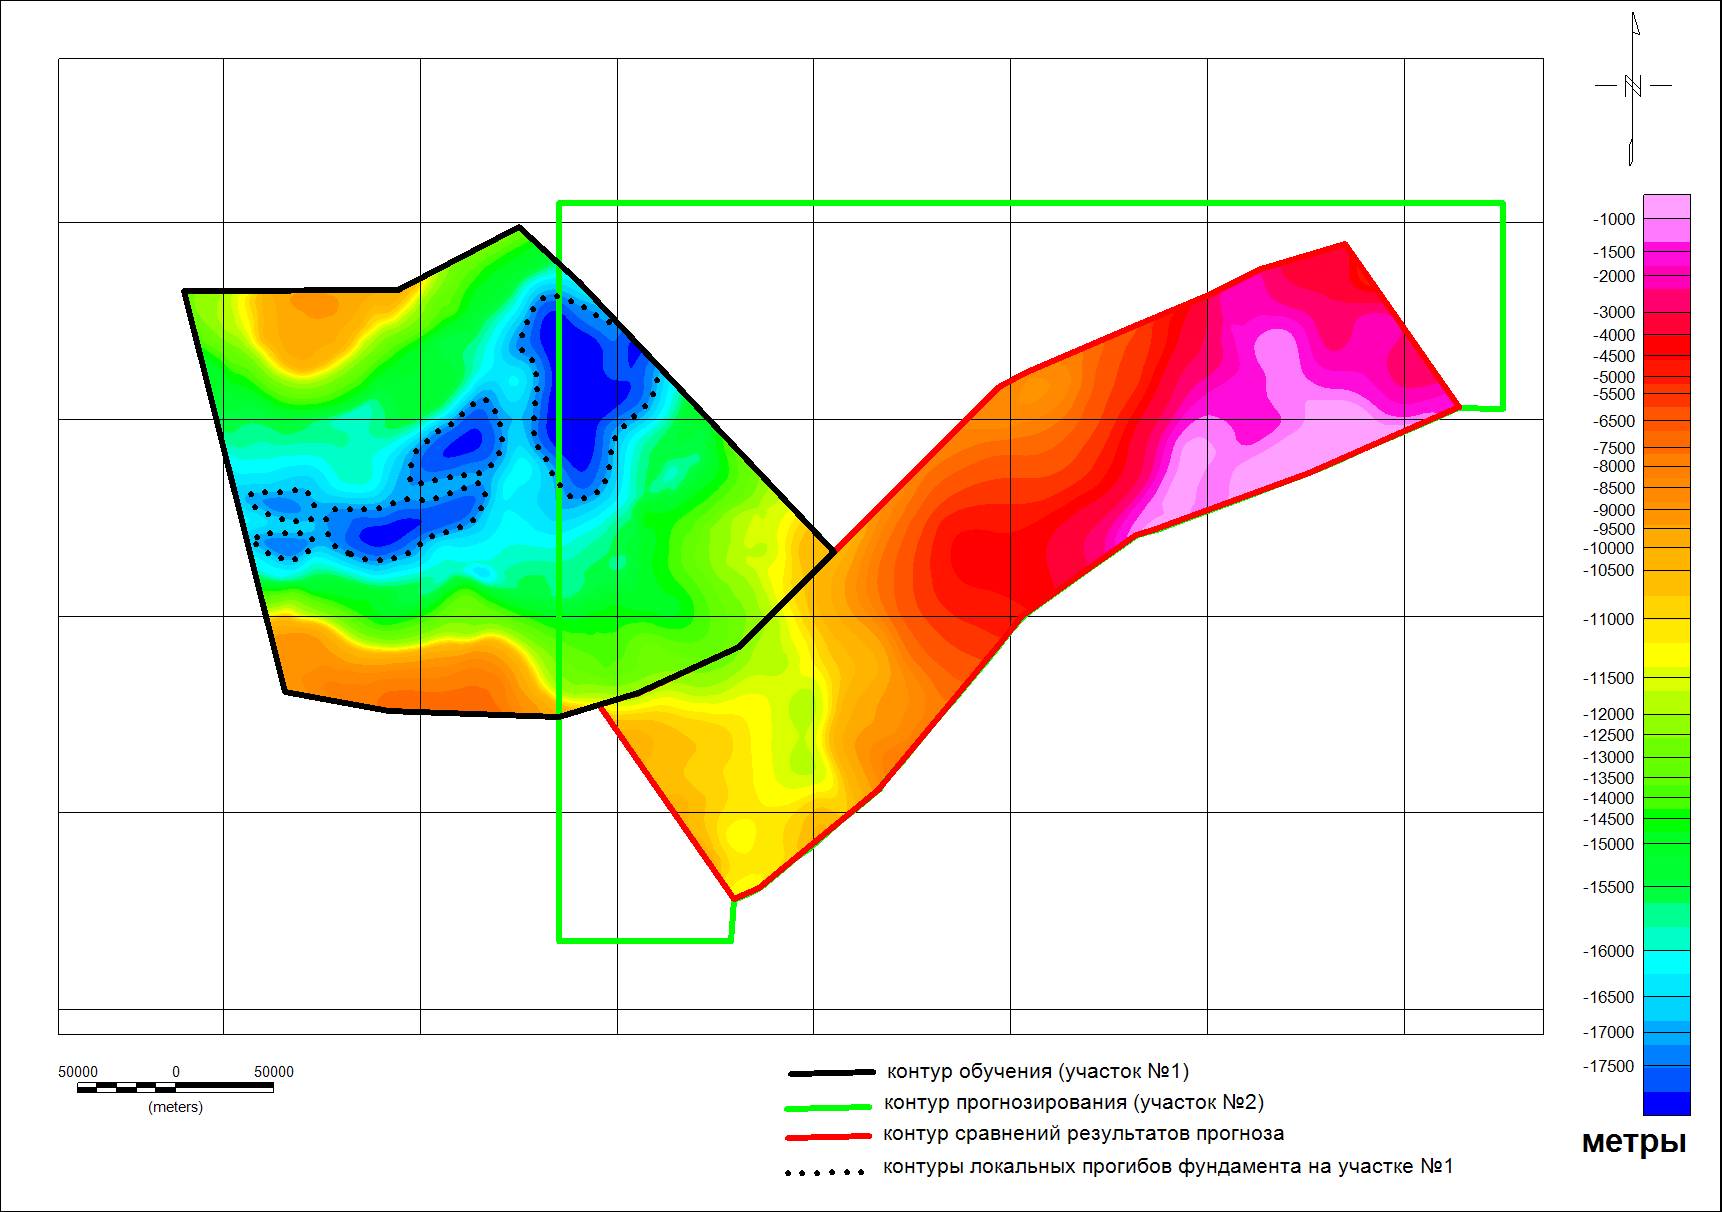

In [129]:
Image("/kaggle/input/image-2/FactFoundation.png")